<h1>E-commerce Data Analysis</h1

<h2>Project Description</h2> In this project, we will analyze customer behavior and satisfaction based on the provided dataset. The goal of our research is to identify key factors influencing customer retention and satisfaction, as well as to offer recommendations for improving the service.


<h2>Research Questions</h2>

<h4>Churn Analysis</h4>
What are the key factors influencing customer churn?<br>
How does customer tenure affect the probability of churn?<br>
How do churn levels vary depending on the PreferredLoginDevice?<br>
<h4>Customer Segmentation</h4>
What customer segments can be identified based on CityTier, Gender, and MaritalStatus?<br>
How do preferred order categories (PreferedOrderCat) differ across customer segments?<br>
<h4>Conversion Analysis</h4>
Which PreferredPaymentModes are more successful in driving conversions?<br>
How does HourSpendOnApp influence the conversion rate?<br>
Is there a relationship between NumberOfDeviceRegistered and the conversion level?<br>
<h4>Customer Satisfaction Analysis</h4>
Which factors drive high SatisfactionScore among customers?<br>
How are complaints (Complain) linked to customer satisfaction levels?<br>
Is there a difference in SatisfactionScore across Gender?<br>
<h4>Complaint Analysis</h4>
What factors most often lead to customer complaints?<br>
How does DaySinceLastOrder impact the likelihood of a complaint?<br>
How does OrderAmountHikeFromLastYear correlate with the number of complaints?<br>
<h4>User Behavior Analysis</h4>
How does the NumberOfDeviceRegistered influence user behavior?<br>
How does user behavior change with varying distances between WarehouseToHome?<br>
How does customer churn vary with the NumberOfAddress added by the user?<br>
<h4>Order Growth Analysis</h4>
What factors contribute to order growth?<br>
How does the use of CouponUsed impact the number of orders?<br>
Is there a relationship between CashbackAmount and order growth?<br>
<h4>Returns and Cashback Analysis</h4>
What factors influence the number of returns and cashback requests?<br>
How does CashbackAmount distribution vary across customer segments?<br>
Is there a link between CouponUsed and the number of returns?<br>

<h2>Description of Variables in the Dataset</h2>

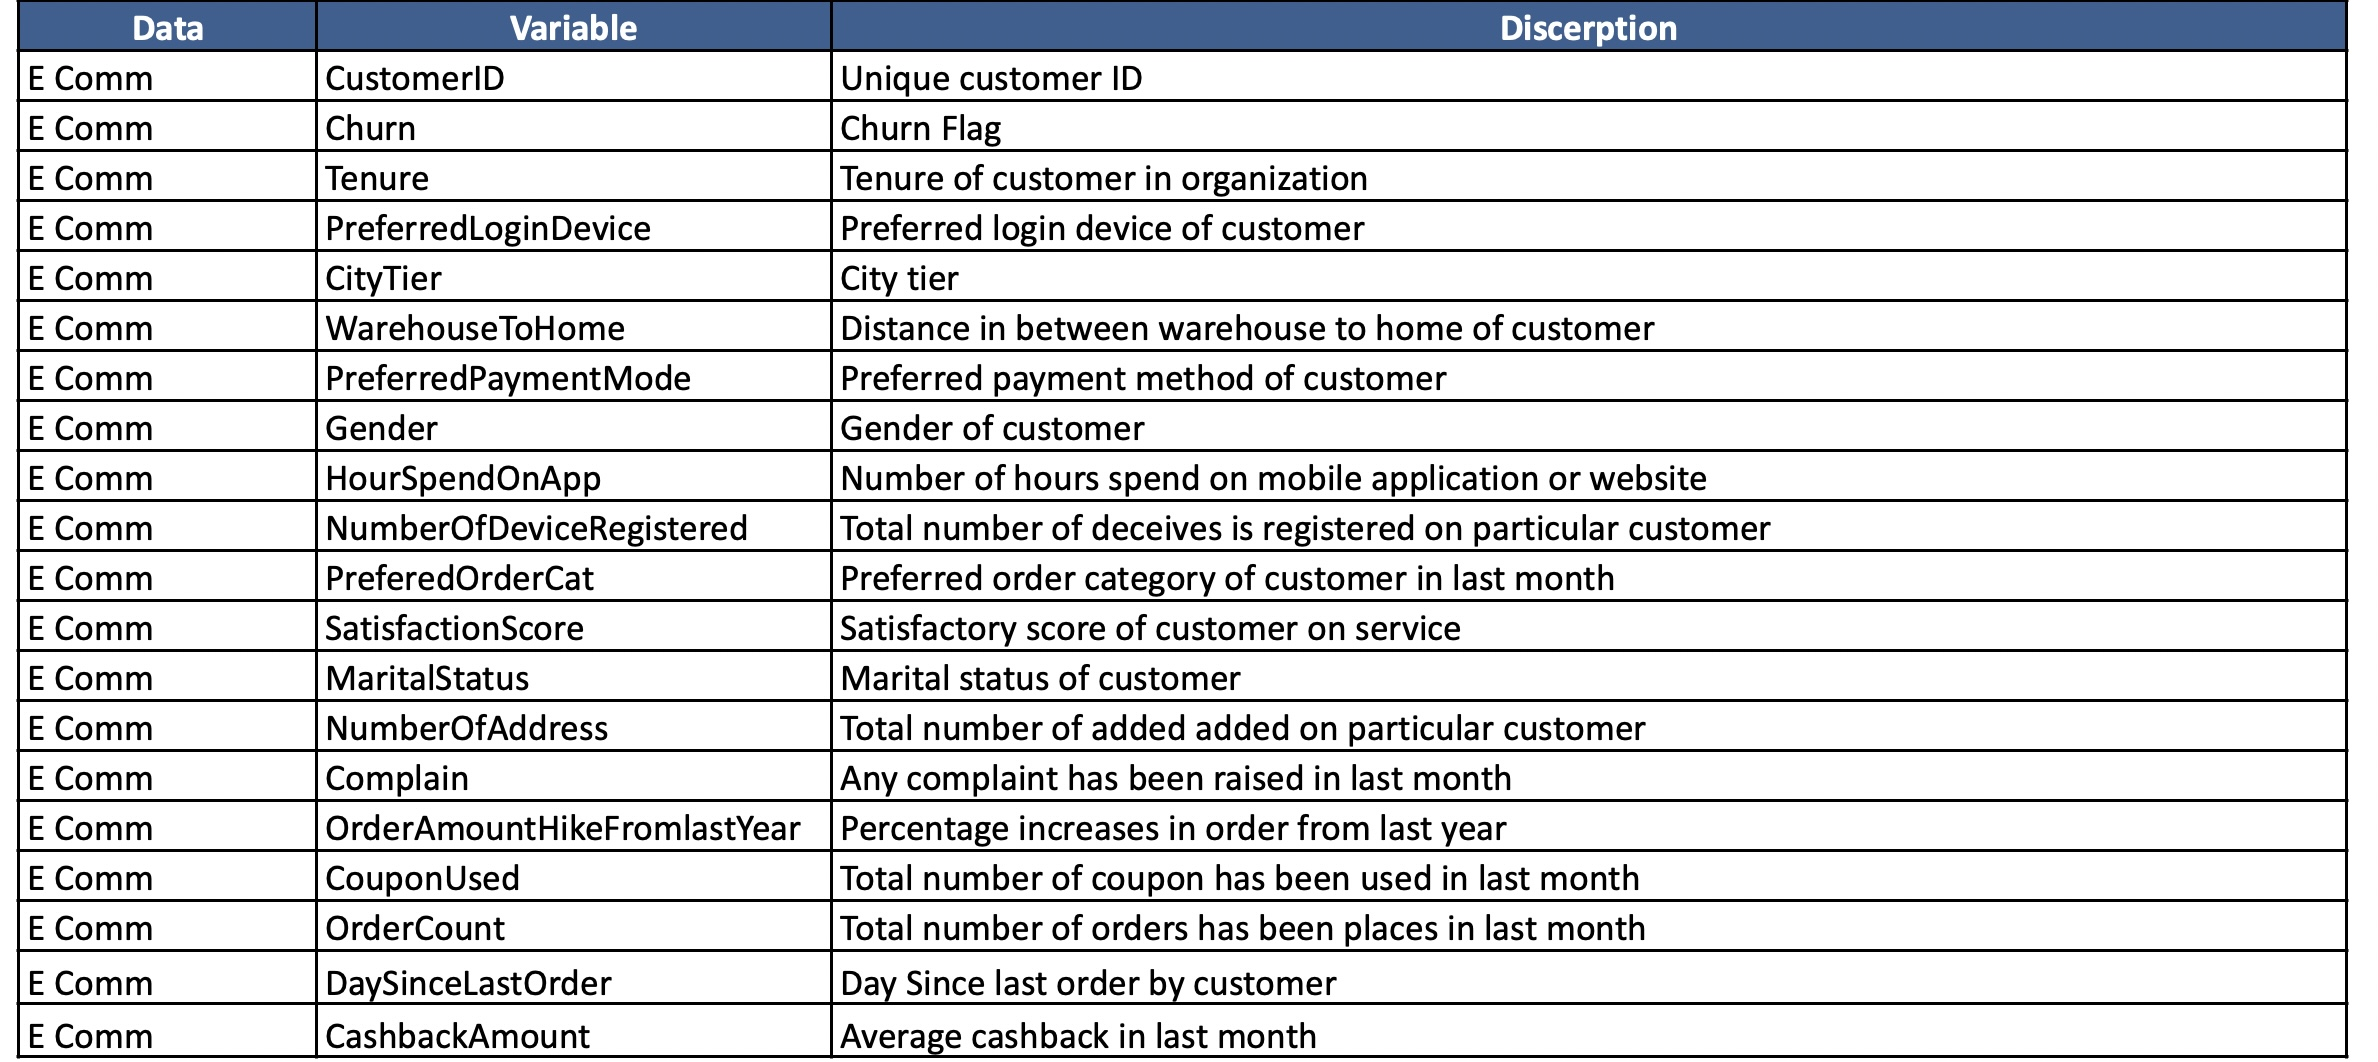

In [8]:
from IPython.display import Image
Image("churn_analysis_variables.jpg")

In [10]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, roc_auc_score, r2_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

<h2>Data Preparation</h2>

In [12]:
df = pd.read_csv("E Commerce Dataset - E Comm.csv")

In [13]:
df

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          50001      1     4.0         Mobile Phone         3   
1          50002      1     NaN                Phone         1   
2          50003      1     NaN                Phone         1   
3          50004      1     0.0                Phone         3   
4          50005      1     0.0                Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55626      0    10.0             Computer         1   
5626       55627      0    13.0         Mobile Phone         1   
5627       55628      0     1.0         Mobile Phone         1   
5628       55629      0    23.0             Computer         3   
5629       55630      0     8.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6.0           Debit Card  Female             3.0   
1                 8.0                  UPI    Male             3.0   
2                30.0           Debit Card    Male             2.0   
3                15.0           Debit Card    Male             2.0   
4                12.0                   CC    Male             NaN   
...               ...                  ...     ...             ...   
5625             30.0          Credit Card    Male             3.0   
5626             13.0          Credit Card    Male             3.0   
5627             11.0           Debit Card    Male             3.0   
5628              9.0          Credit Card    Male             4.0   
5629             15.0          Credit Card    Male             3.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
0                            3  Laptop & Accessory                  2   
1                            4              Mobile                  3   
2                            4              Mobile                  3   
3                            4  Laptop & Accessory                  5   
4                            3              Mobile                  5   
...                        ...                 ...                ...   
5625                         2  Laptop & Accessory                  1   
5626                         5             Fashion                  5   
5627                         2  Laptop & Accessory                  4   
5628                         5  Laptop & Accessory                  4   
5629                         2  Laptop & Accessory                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0           Single                9         1                         11.0   
1           Single                7         1                         15.0   
2           Single                6         1                         14.0   
3           Single                8         0                         23.0   
4           Single                3         0                         11.0   
...            ...              ...       ...                          ...   
5625       Married                6         0                         18.0   
5626       Married                6         0                         16.0   
5627       Married                3         1                         21.0   
5628       Married                4         0                         15.0   
5629       Married                4         0                         13.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
0            1.0         1.0                5.0             160  
1            0.0         1.0                0.0             121  
2            0.0         1.0                3.0             120  
3            0.0         1.0                3.0             134  
4            1.0         1.0                3.0             130  
...          ...         ...                ...             ...  
5625         1.0         2.0                4.0             151  
5626         1.0         2.0  

In [14]:
missing_values = df.isna().sum()

In [19]:
missing_values

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Several variables contain null values. We'll fix this. First, let's check the data for normal distribution.

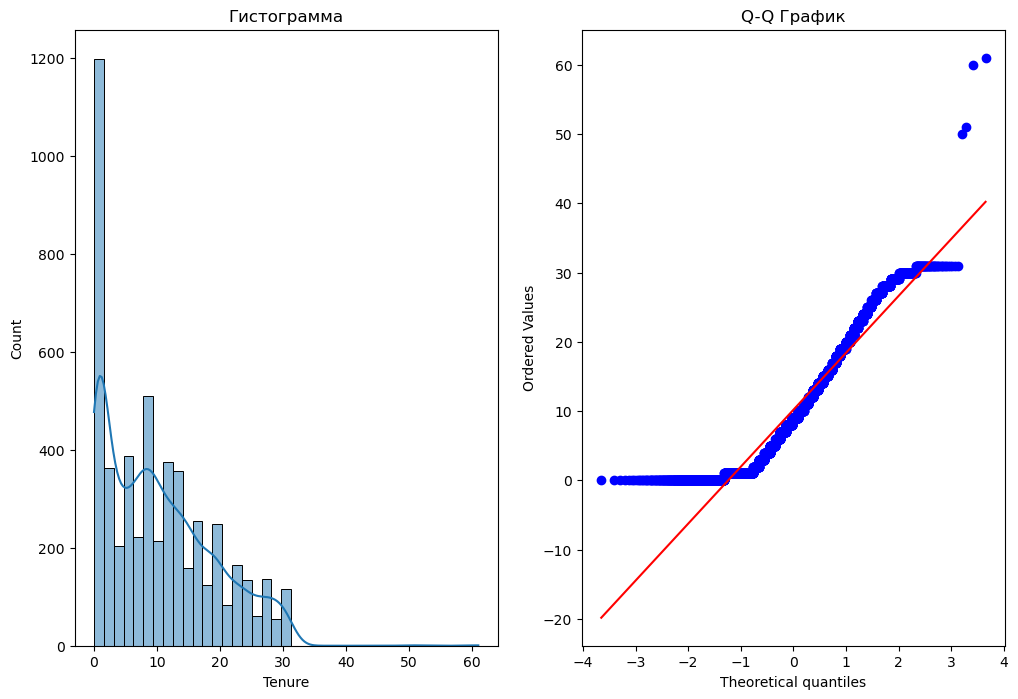

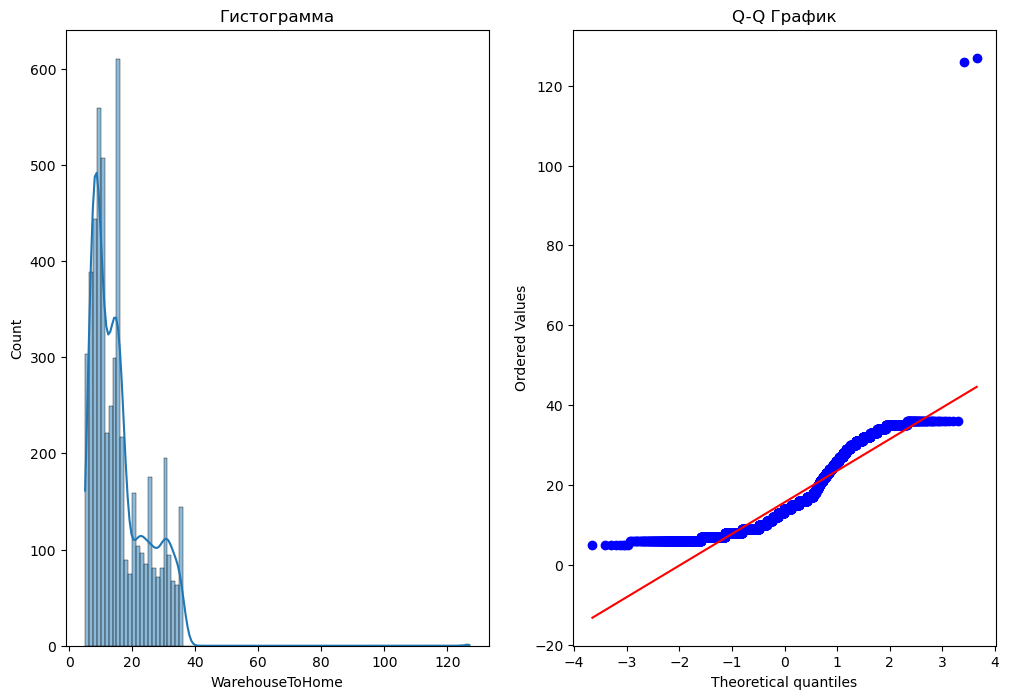

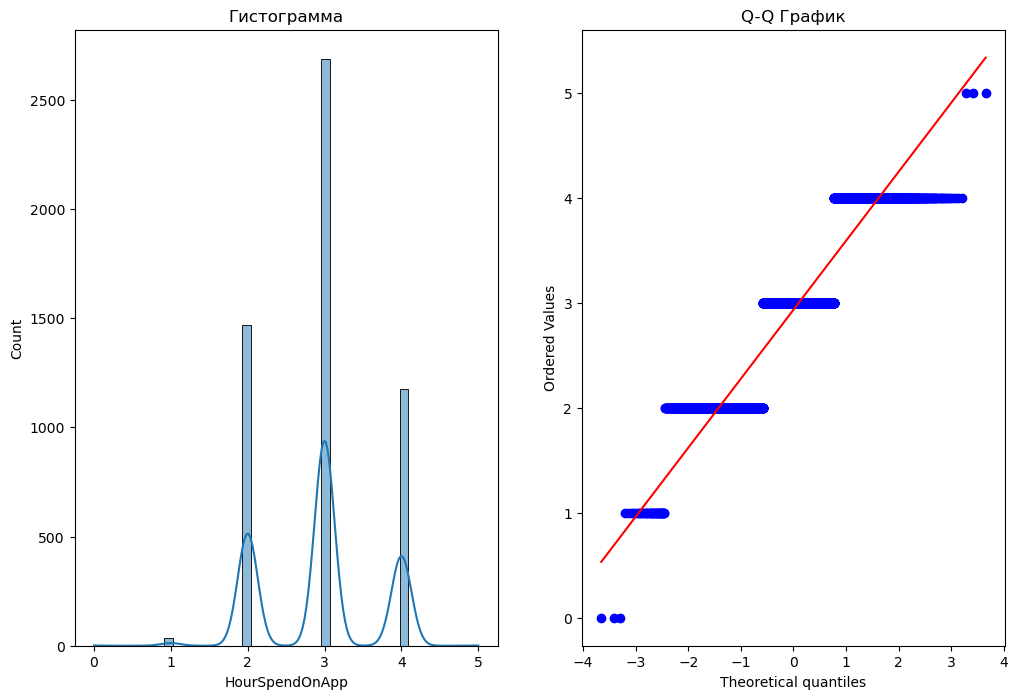

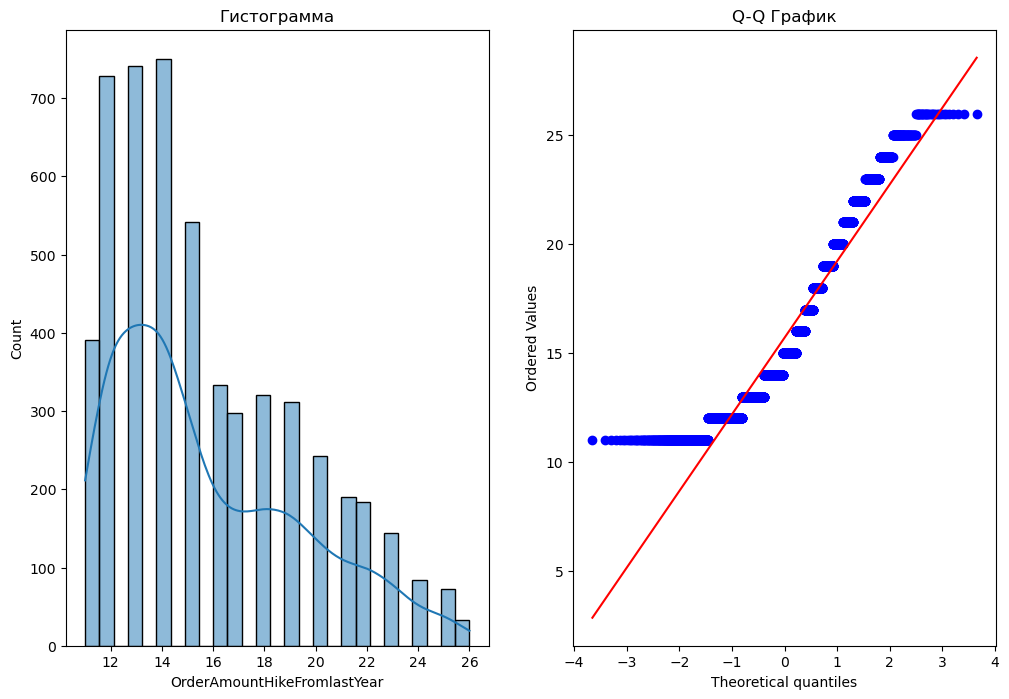

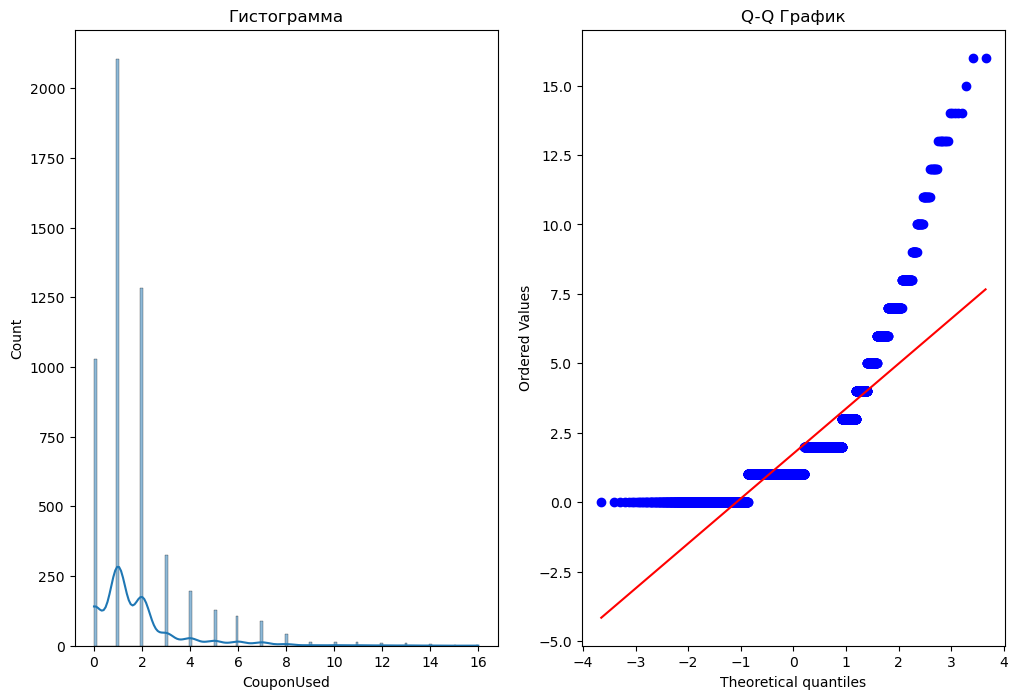

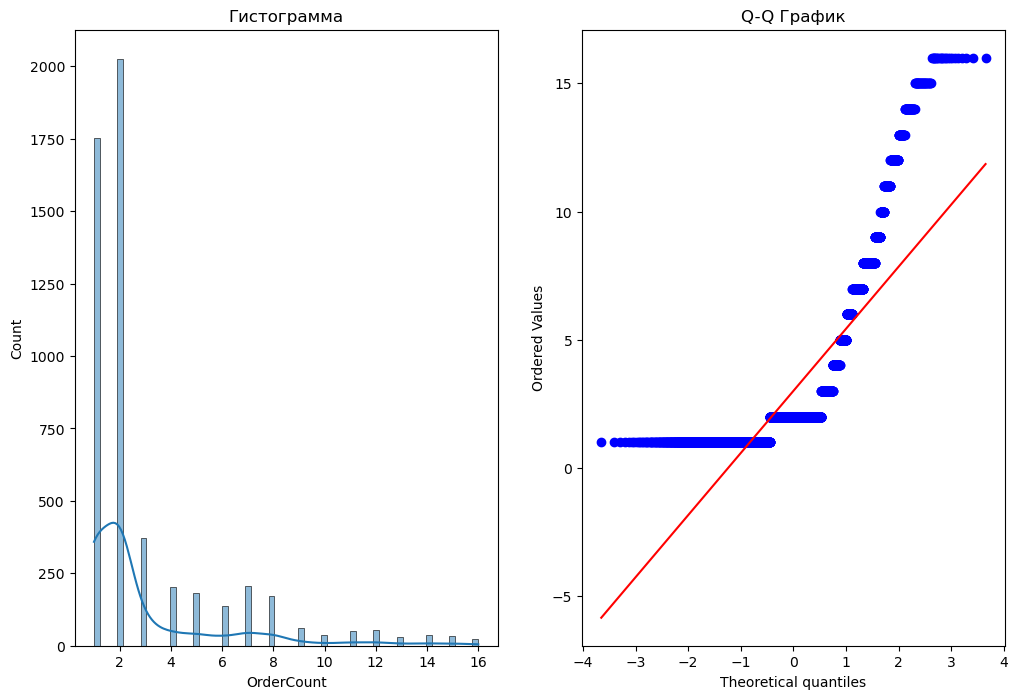

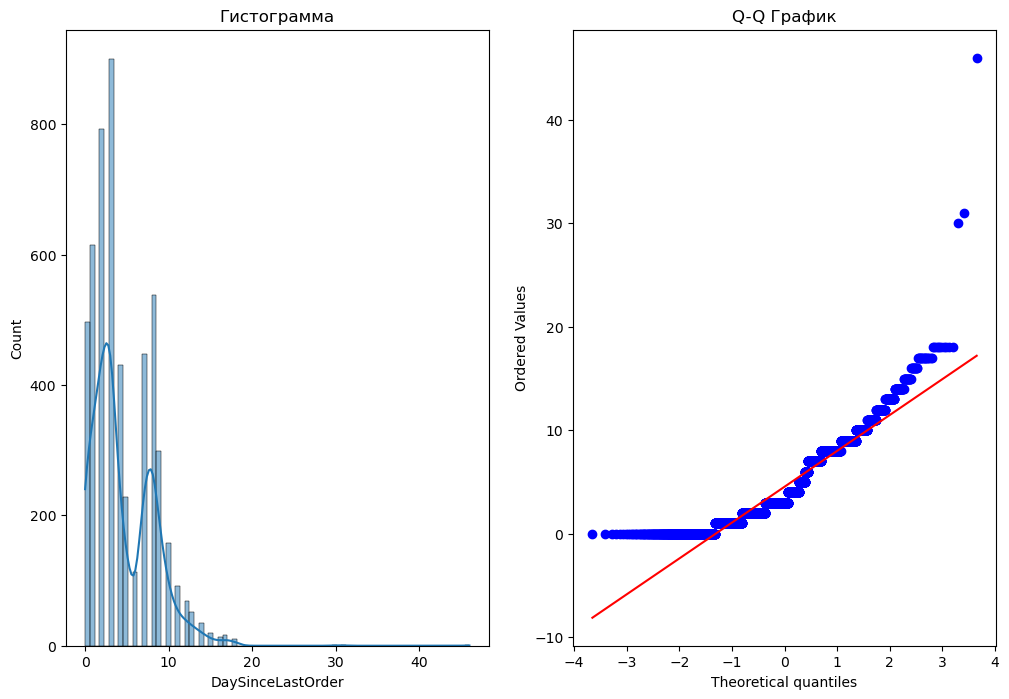

In [22]:
columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']

for column in columns:
    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column].dropna(), kde=True)
    plt.title('Гистограмма')
    
    plt.subplot(1, 2, 2)
    sp.stats.probplot(df[column].dropna(), dist="norm", plot=plt)
    plt.title('Q-Q График')
    
    plt.show()

The distribution is not normal and the data contains outliers, so we decide to replace the missing values with the median.

In [24]:
for column in columns:
    df[column].fillna(df[column].median(), inplace=True)

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_9223/2621601603.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


In [25]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [26]:
df.duplicated().sum()

0

The issue with missing values has been resolved. There are no duplicates or errors. Outliers are not anomalies. The data is now cleaned and prepared.

<h2>Preliminary Analysis</h2>

In [29]:
df.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5630.000000  5630.000000      5630.000000   
mean   52815.500000     0.168384    10.134103     1.654707        15.566785   
std     1625.385339     0.374240     8.357951     0.915389         8.345961   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     3.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    15.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5630.000000               5630.000000        5630.000000   
mean         2.934636                  3.688988           3.066785   
std          0.705528                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5630.000000  5630.000000   
mean          4.214032     0.284902                    15.674600     1.716874   
std           2.583586     0.451408                     3.591058     1.857640   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5630.000000        5630.000000     5630.000000  
mean      2.961812           4.459325      177.221492  
std       2.879248           3.570626       49.193869  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      146.000000  
50%       2.000000           3.000000      163.000000  
75%       3.000000           7.000000      196.000000  
max      16.000000          46.000000      325.000000

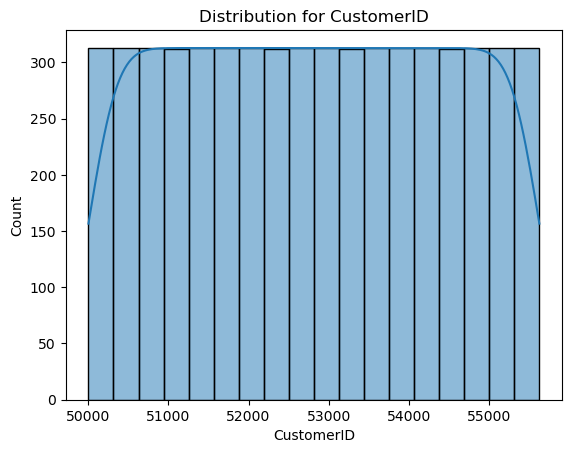

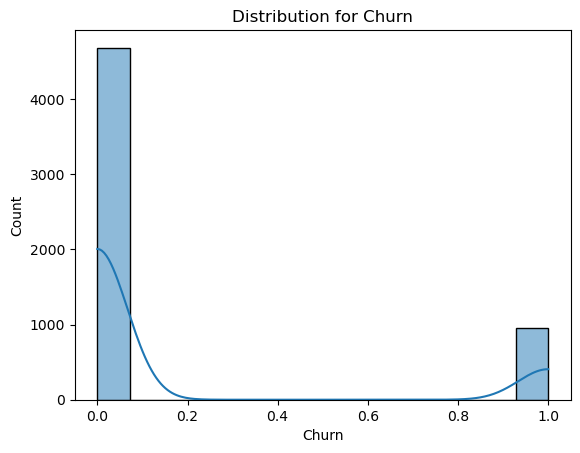

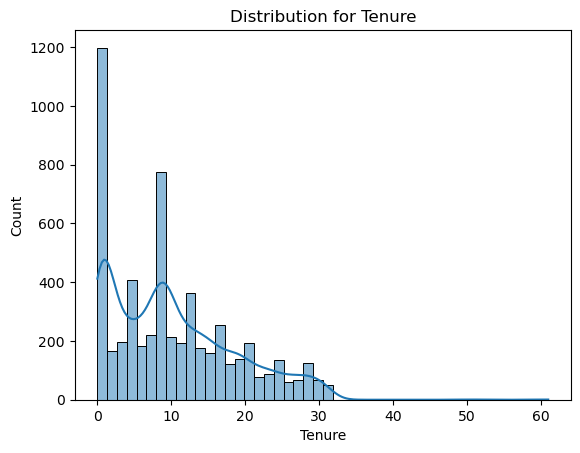

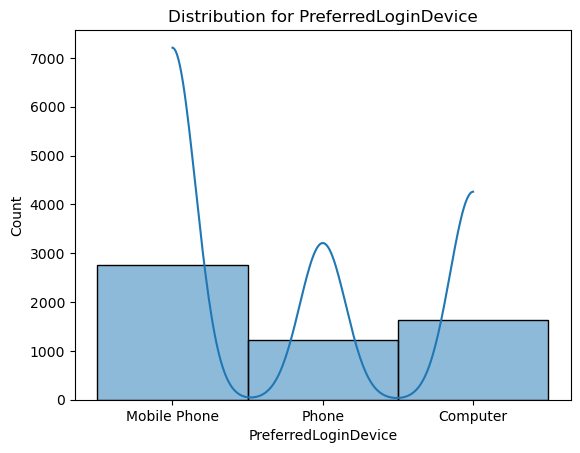

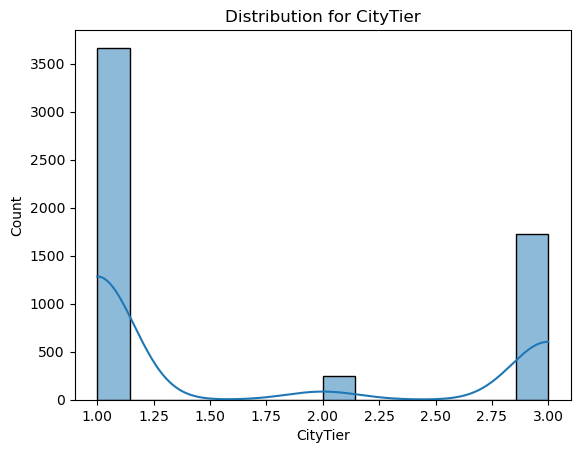

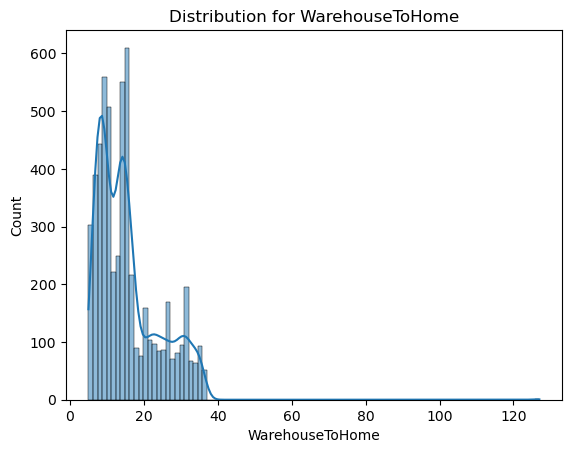

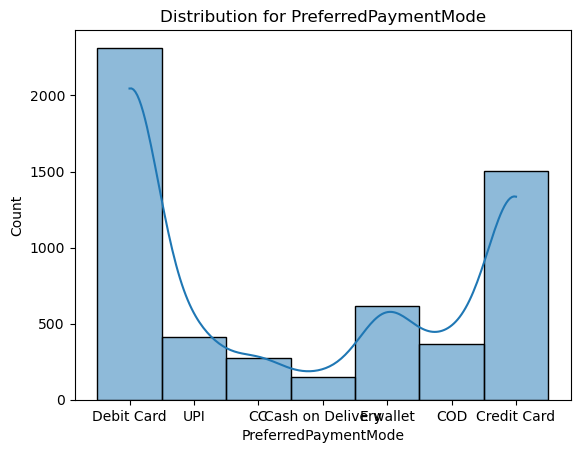

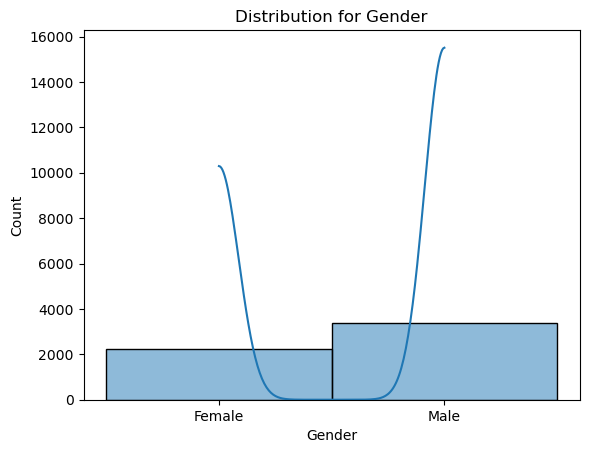

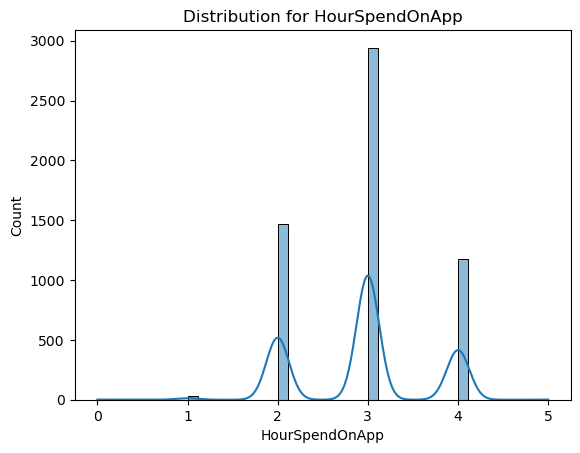

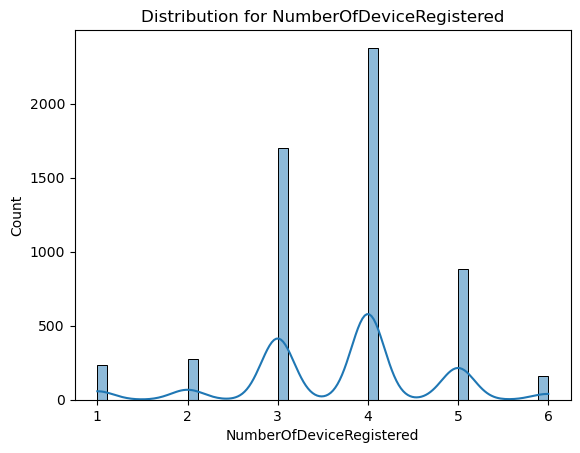

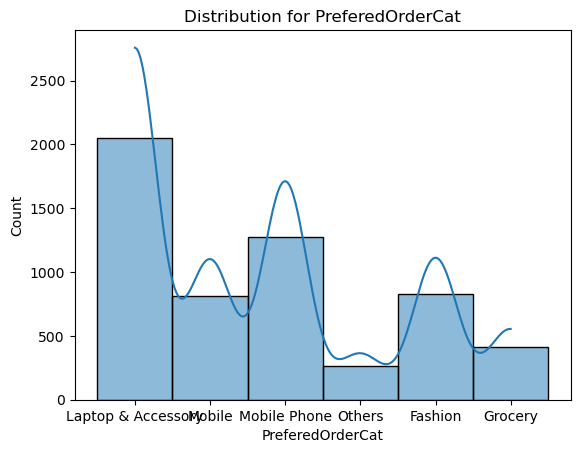

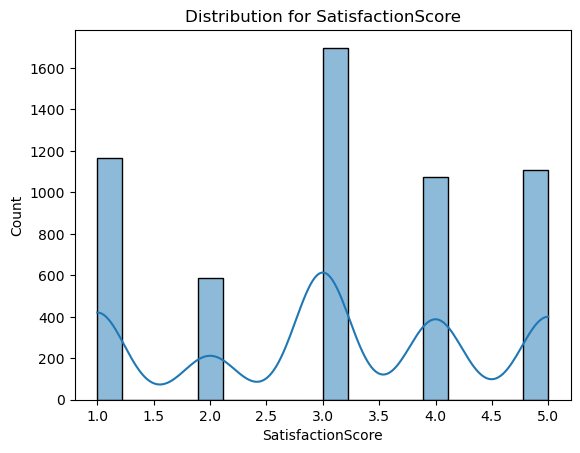

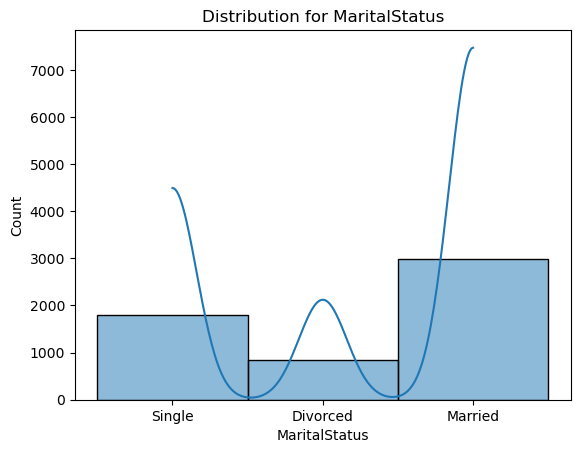

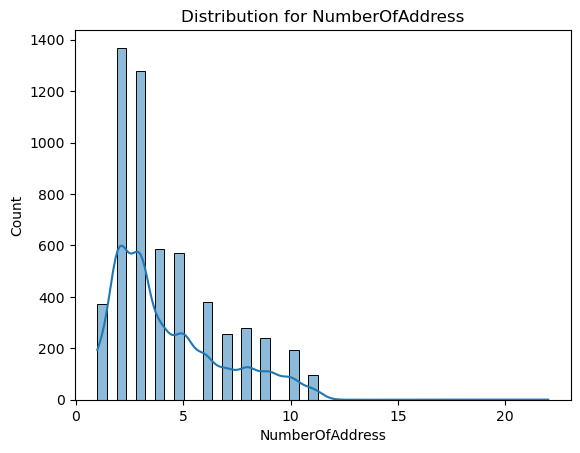

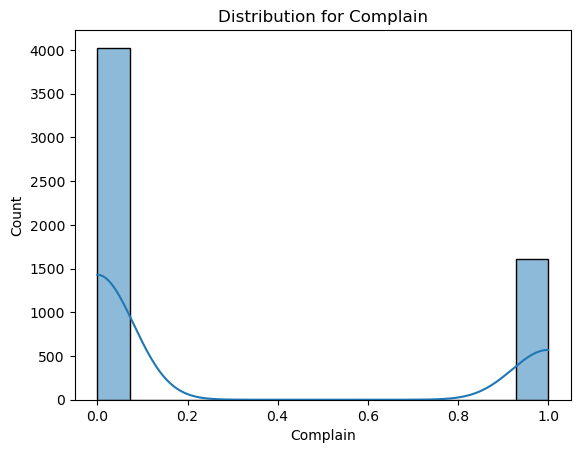

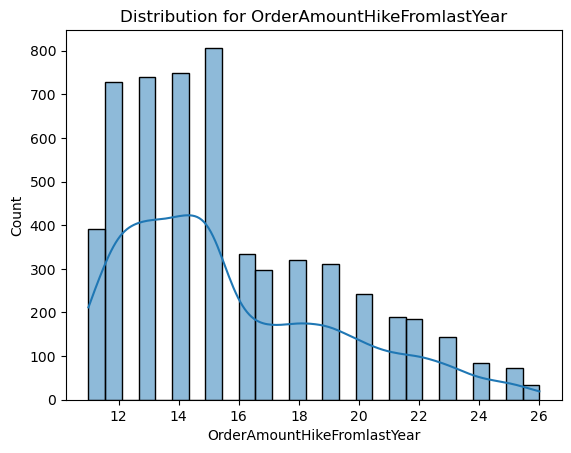

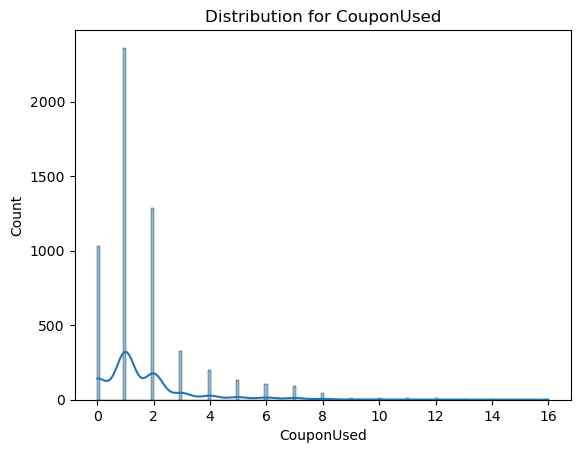

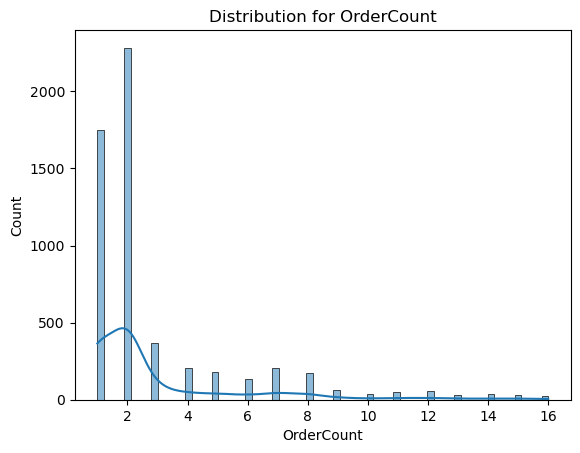

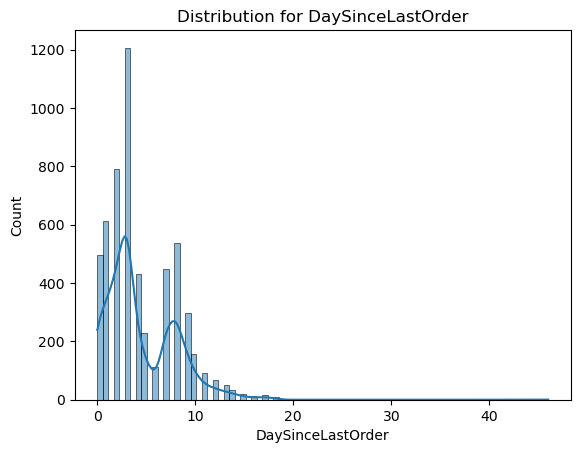

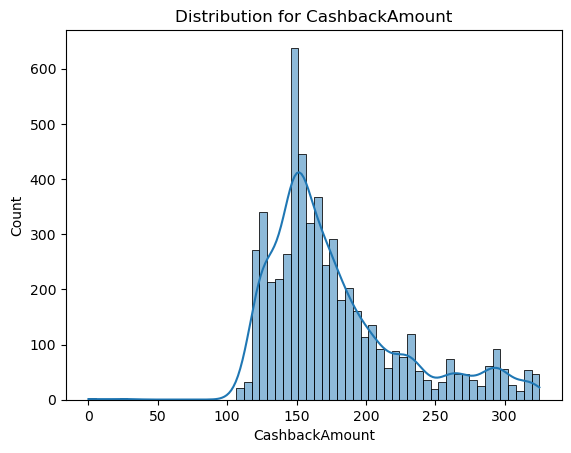

In [30]:
for column in df.columns:
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Distribution for {column}')
    plt.show()

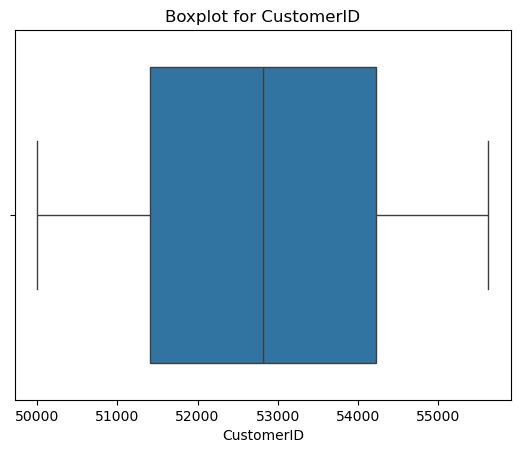

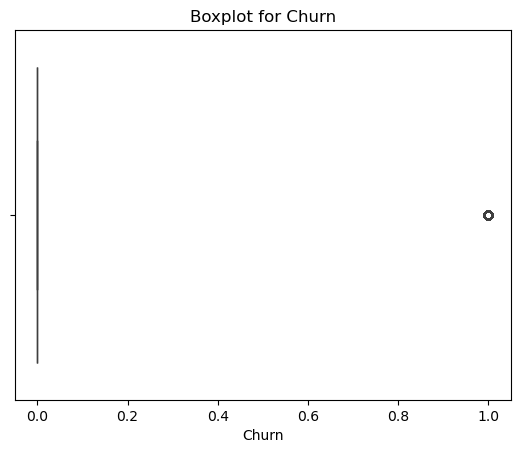

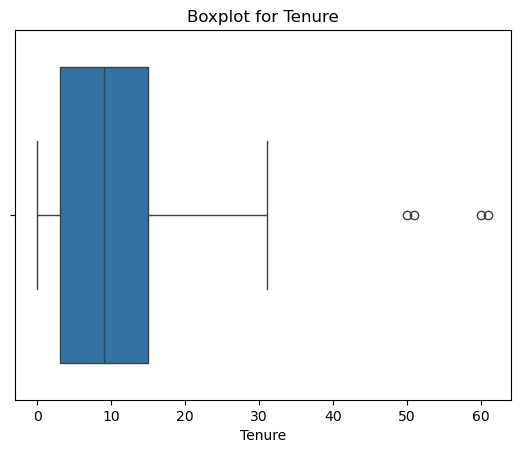

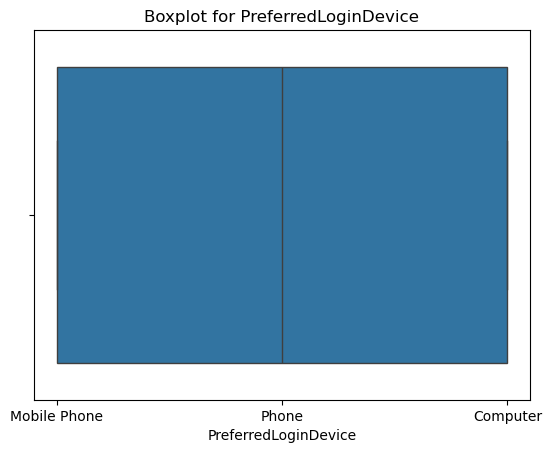

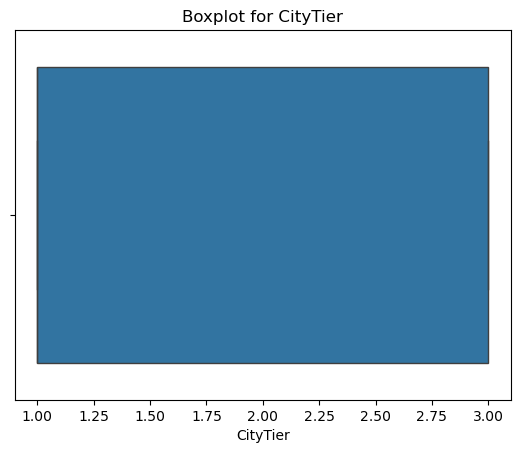

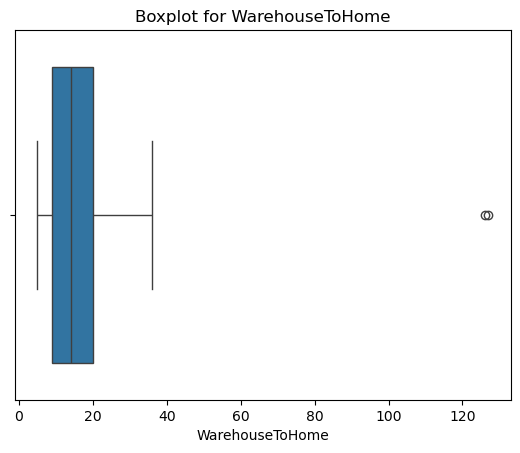

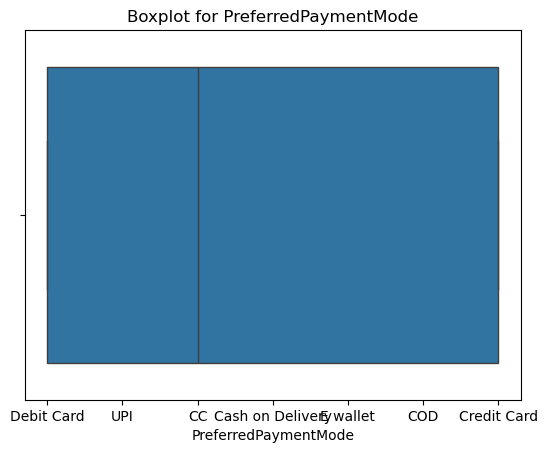

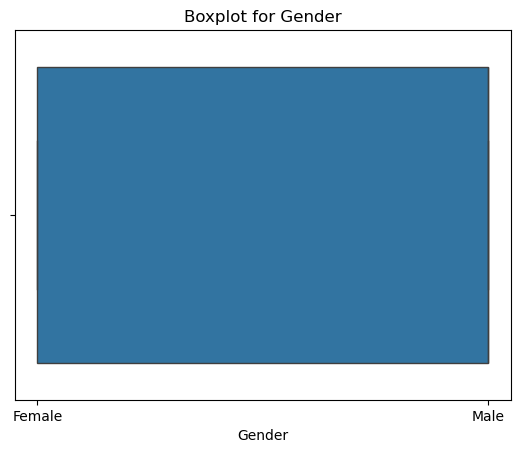

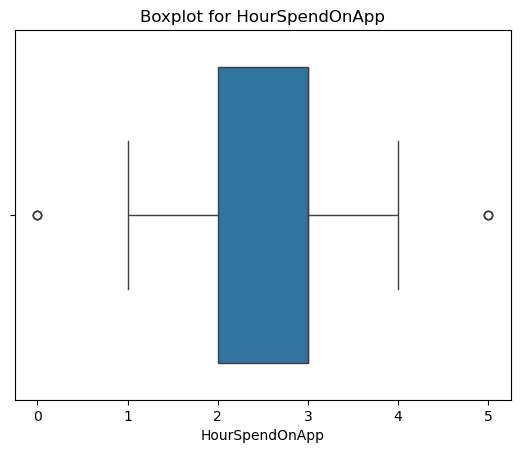

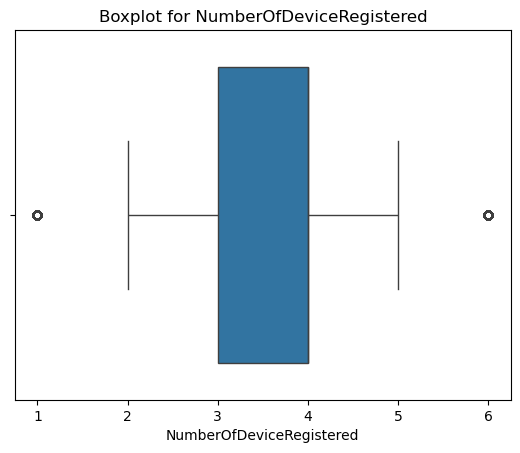

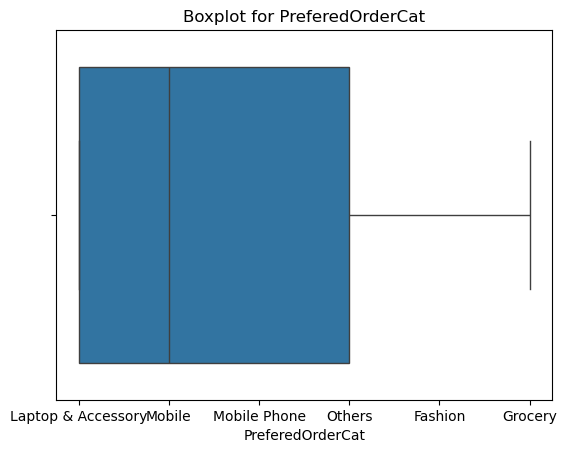

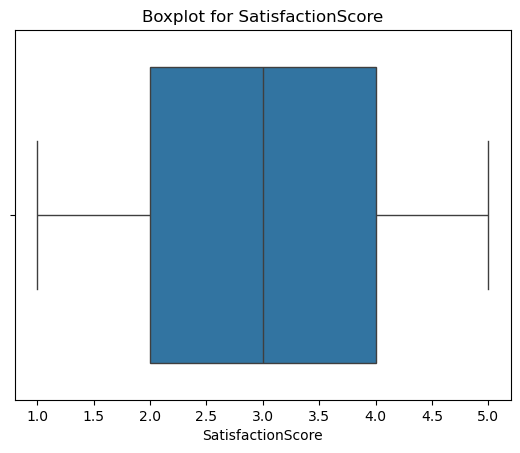

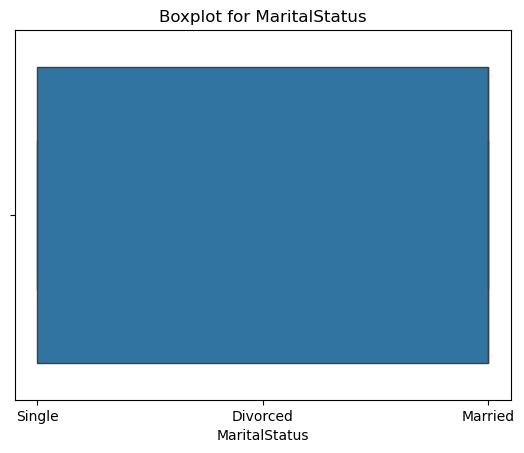

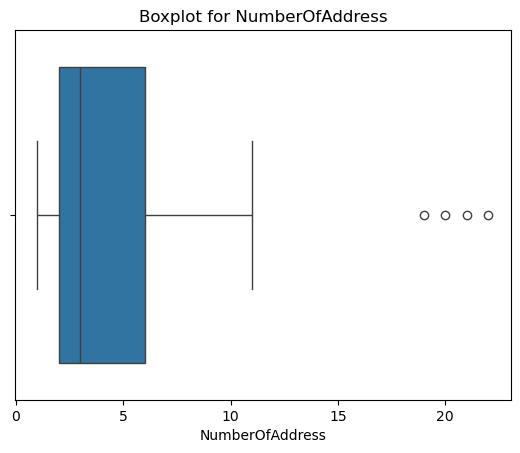

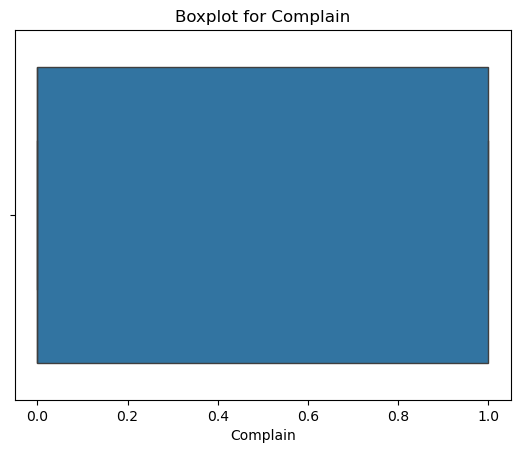

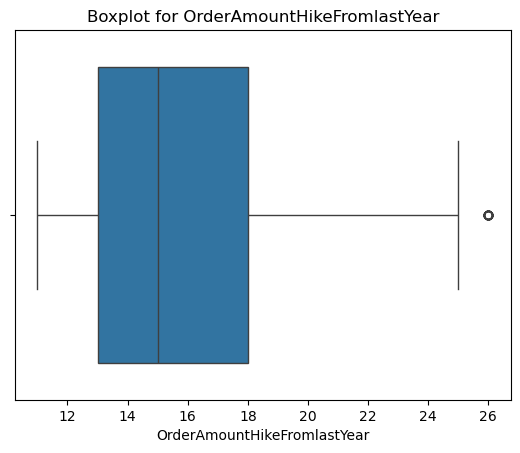

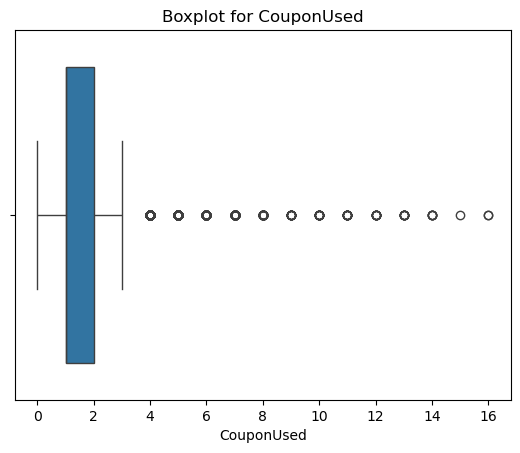

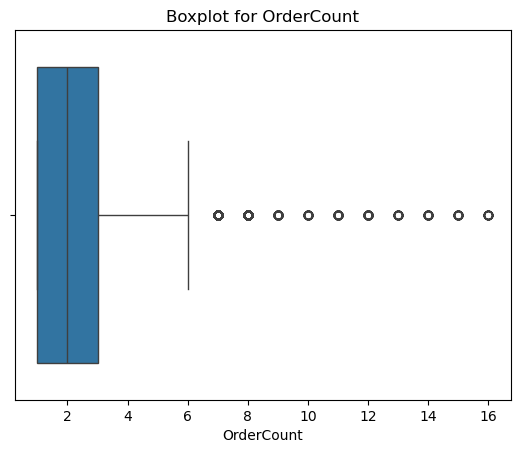

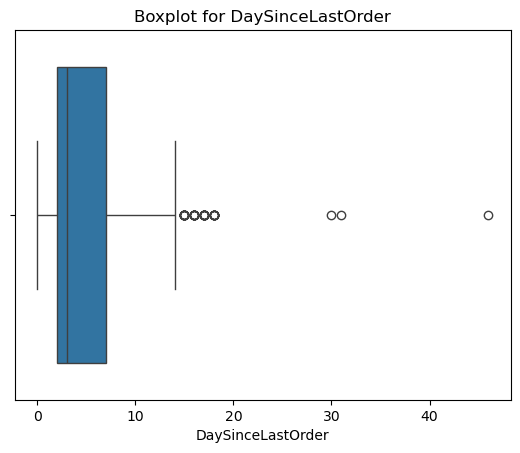

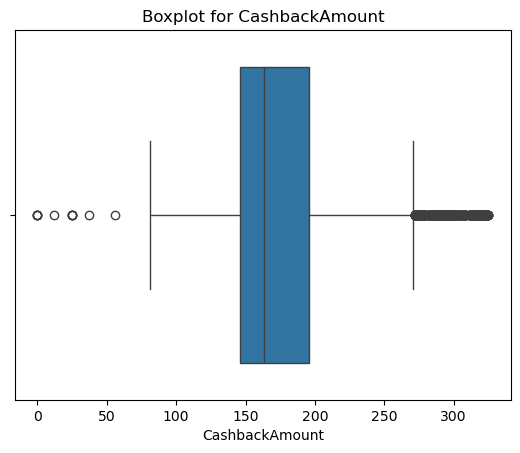

In [31]:
for column in df.columns:
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot for {column}')
    plt.show()

The data is not normally distributed, and some variables have outliers that are not errors. Outliers may hold valuable information, so they should be included in the analysis. The data should be analyzed considering its actual distribution. In the subsequent analysis, we will use methods that are robust to non-normal data distribution and resistant to outliers.

In [38]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

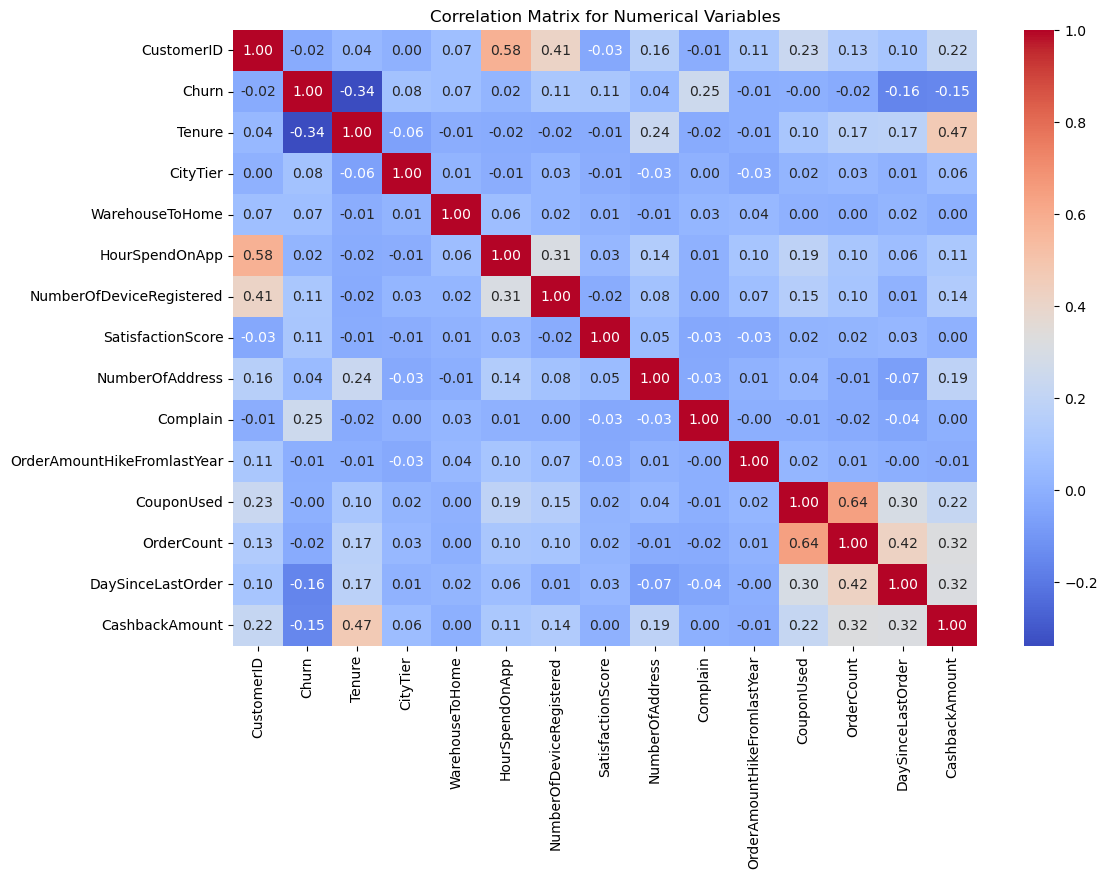

In [39]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix for Numerical Variables")
plt.show()

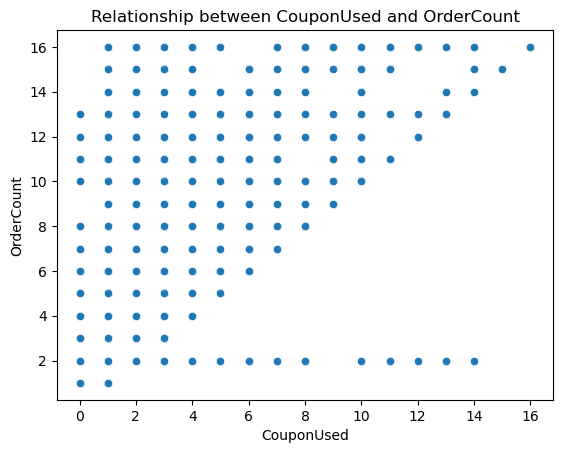

In [40]:
sns.scatterplot(data=df, x='CouponUsed', y='OrderCount')
plt.title("Relationship between CouponUsed and OrderCount")
plt.show()

<h3>Based on the provided correlations, the following initial conclusions can be drawn:<br></h3> A correlation of 0.64 between the variables CouponUsed (use of coupons) and OrderCount (number of orders) indicates a strong positive relationship. This means that an increase in the number of coupons used is associated with a rise in the number of orders.<br> <br> DaysSinceLastOrder and OrderCount (0.42): A moderate positive correlation suggests that customers who place orders more frequently (high OrderCount) spend less time between orders (DaysSinceLastOrder).<br>
CashbackAmount and Tenure (0.47): A moderate positive correlation indicates that customers who receive higher cashback amounts (CashbackAmount) are often those with longer tenures (Tenure).<br>
NumberOfDeviceRegister and HoursSpendOnApp (0.31): A weak positive correlation suggests that customers with more registered devices spend slightly more time using the app.<br>
A weak positive correlation (0.25) implies that customers with more complaints (Complain) are somewhat less likely to leave the service (Churn).<br>
A weak positive correlation (0.3) may suggest that customers who order less frequently (higher DaysSinceLastOrder) tend to use coupons more often (CouponUsed).<br>
DaysSinceLastOrder and CashbackAmount (0.32): A weak positive correlation might indicate that customers who place orders less frequently receive slightly higher cashback amounts.<br>
The correlation between OrderCount (number of orders) and CashbackAmount (cashback amount), equal to 0.3, suggests a moderate positive relationship. This means that as the number of orders increases, the cashback amount tends to slightly increase.
Other correlations are extremely small, making it difficult to draw meaningful conclusions.

<h2>Main Analysis</h2>

<h3>Churn Analysis</h3>

What factors have the greatest impact on customer churn?

In [45]:
numeric_df = numeric_df.drop(columns=['CustomerID'])
X = numeric_df.drop(columns=['Churn'])
y = numeric_df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}")

importance = pd.Series(model.feature_importances_, index=X.columns)
print("Importance of Factors:")
print(importance.sort_values(ascending=False))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       941
           1       0.99      0.86      0.92       185

    accuracy                           0.98      1126
   macro avg       0.98      0.93      0.95      1126
weighted avg       0.98      0.98      0.97      1126

ROC-AUC: 0.986104489186317
Importance of Factors:
Tenure                         0.246984
CashbackAmount                 0.134192
WarehouseToHome                0.091206
NumberOfAddress                0.080860
DaySinceLastOrder              0.078037
OrderAmountHikeFromlastYear    0.077750
Complain                       0.060118
SatisfactionScore              0.057434
NumberOfDeviceRegistered       0.045757
OrderCount                     0.039966
CouponUsed                     0.035810
CityTier                       0.026554
HourSpendOnApp                 0.025332
dtype: float64


/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_9223/103830534.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")


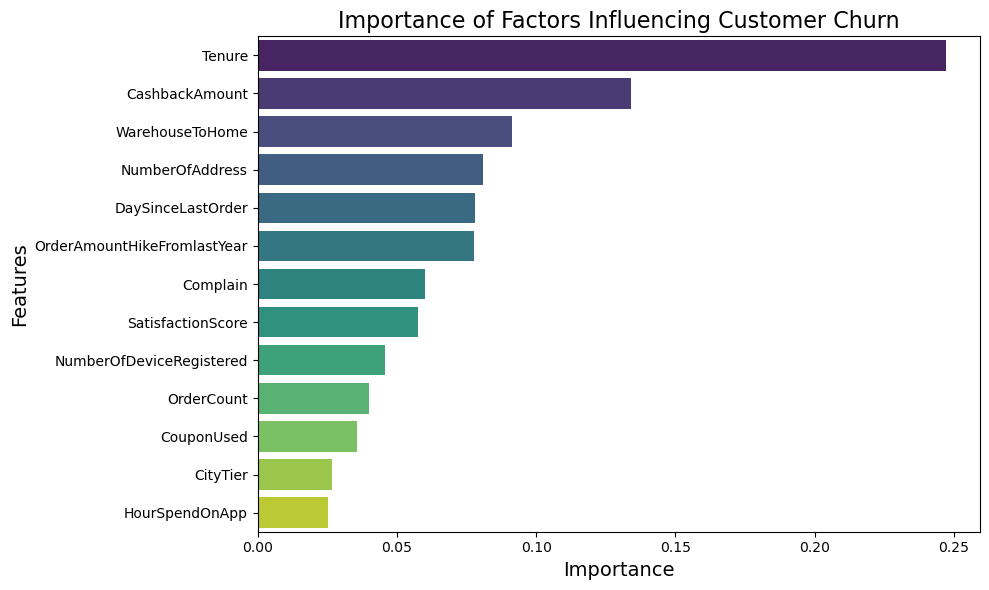

In [46]:
importance_df = importance.sort_values(ascending=False).reset_index()
importance_df.columns = ['Feature', 'Importance']

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title("Importance of Factors Influencing Customer Churn", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.tight_layout()
plt.show()

What is the probability of churn depending on the customer's tenure in the organization?

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_9223/3777859179.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby('TenureGroup')['Churn'].mean().reset_index()
/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_9223/3777859179.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TenureGroup', y='Churn', data=churn_rate, palette="coolwarm")


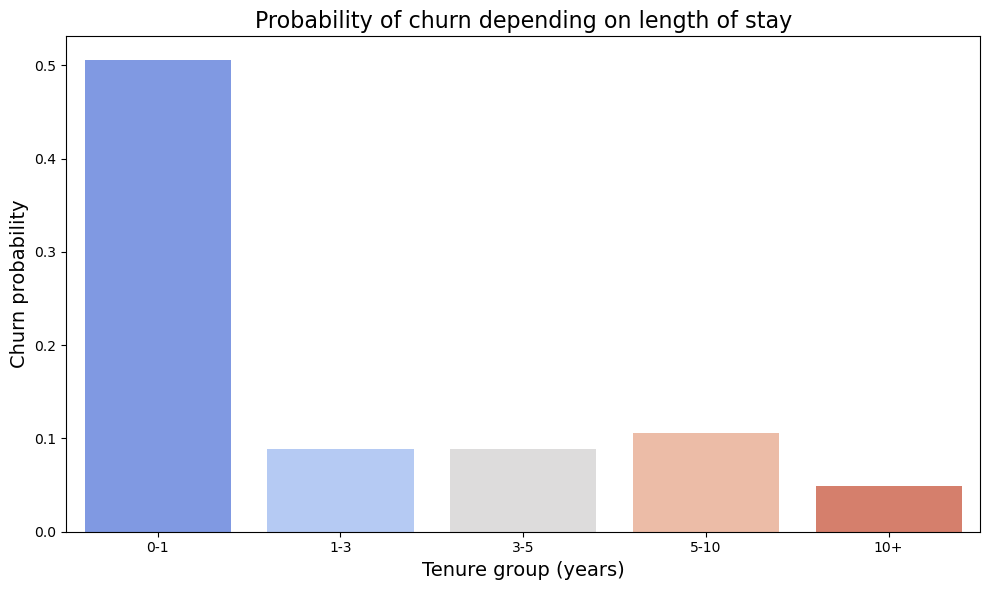

In [48]:
df['TenureGroup'] = pd.cut(df['Tenure'], bins=[0, 1, 3, 5, 10, 100], labels=['0-1', '1-3', '3-5', '5-10', '10+'])


churn_rate = df.groupby('TenureGroup')['Churn'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='TenureGroup', y='Churn', data=churn_rate, palette="coolwarm")
plt.title("Probability of churn depending on length of stay", fontsize=16)
plt.xlabel("Tenure group (years)", fontsize=14)
plt.ylabel("Churn probability", fontsize=14)
plt.tight_layout()
plt.show()

How Churn Levels Vary by PreferredLoginDevice?

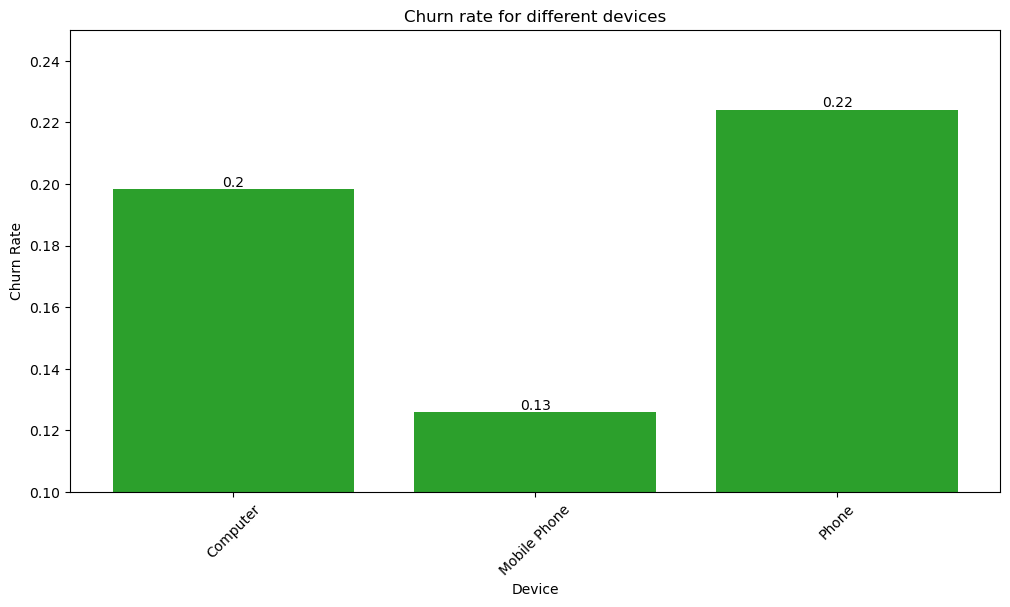

In [51]:
churn_by_device = df.groupby('PreferredLoginDevice')['Churn'].mean()
# churn_by_device.rename(columns={'Churn': 'ChurnRate'}, inplace=True)
device = churn_by_device.index.tolist() 
value = churn_by_device.values.tolist()

plt.figure(figsize=(12, 6))
bars = plt.bar(device, value, color='#2ca02c')
plt.xlabel('Device')
plt.ylabel('Churn Rate')
plt.title('Churn rate for different devices')
plt.xticks(rotation=45)
plt.ylim(0.1, 0.25)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

<h3>Customer Segmentation</h3>

What customer segments can be identified based on CityTier, Gender, and MaritalStatus?

In [54]:
city_tier_counts = df['CityTier'].value_counts()
gender_counts = df['Gender'].value_counts()
marital_status_counts = df['MaritalStatus'].value_counts()

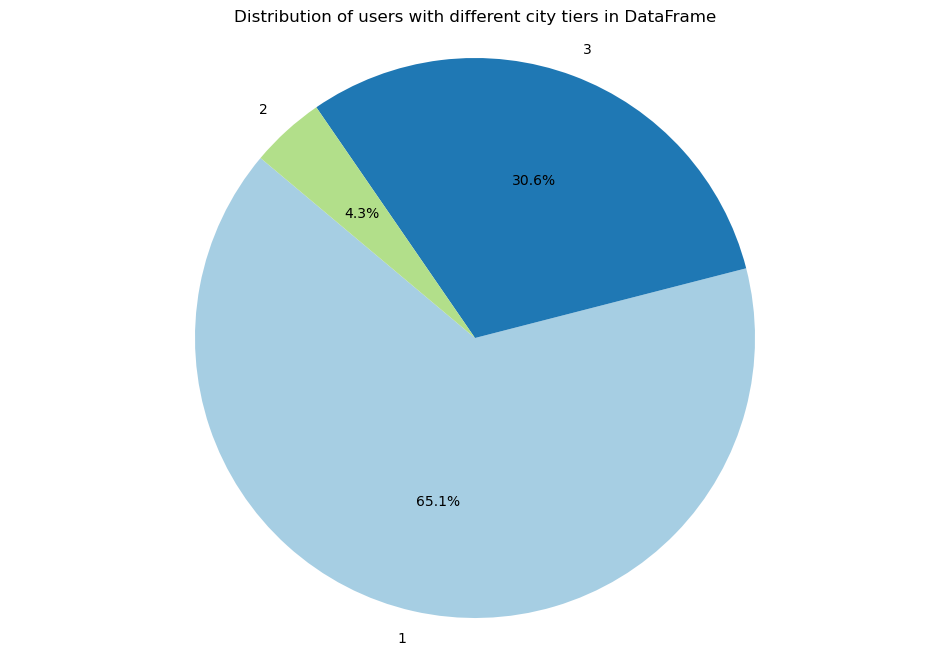

In [55]:
plt.figure(figsize=(12, 8))
plt.pie(city_tier_counts, labels=city_tier_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of users with different city tiers in DataFrame')
plt.axis('equal')
plt.show()

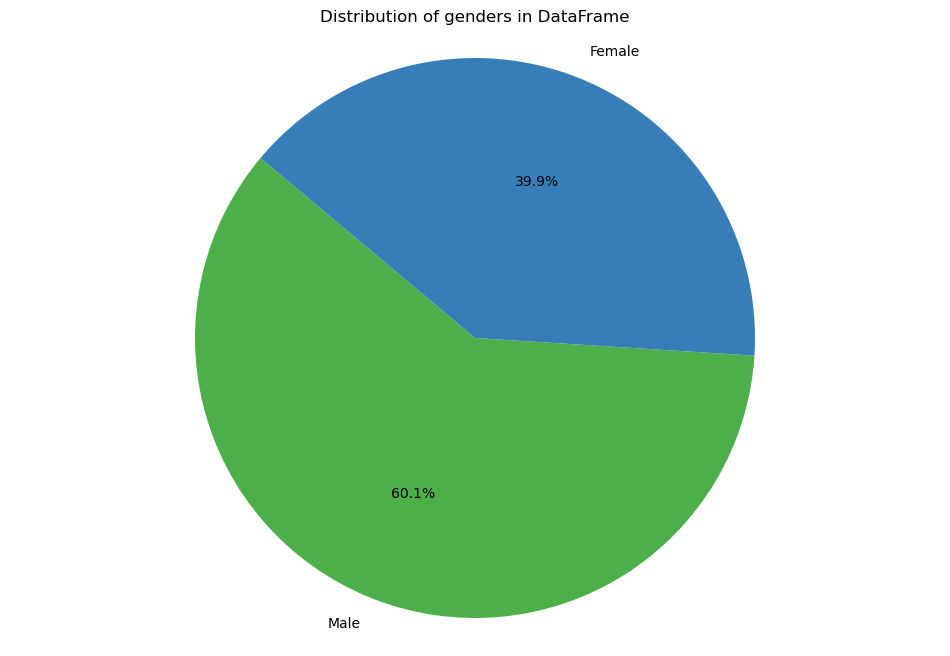

In [58]:
plt.figure(figsize=(12, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#4daf4a', '#377eb8', '#ff7f00'])
plt.title('Distribution of genders in DataFrame')
plt.axis('equal')
plt.show()

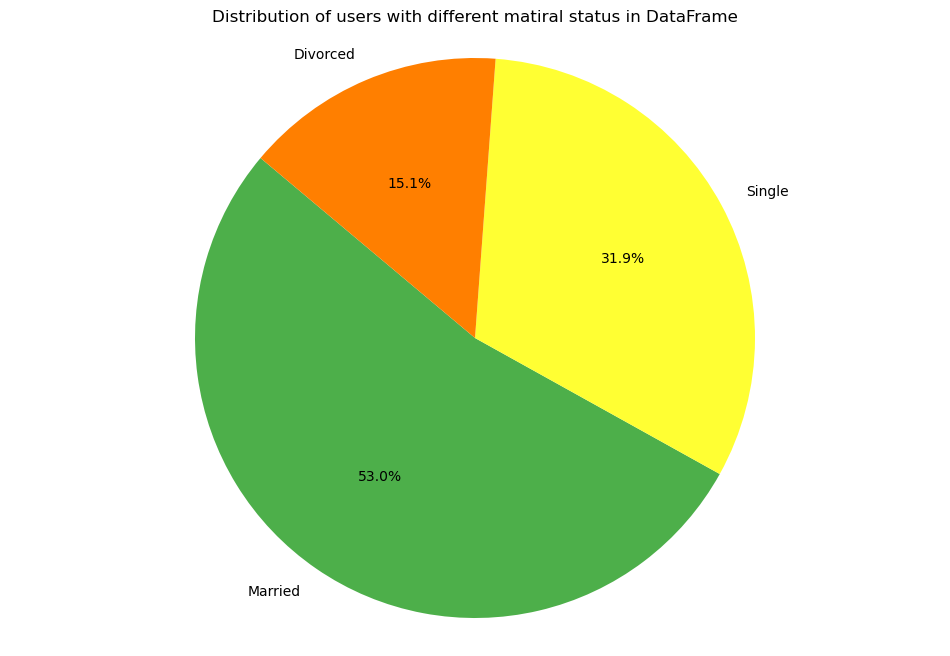

In [61]:
plt.figure(figsize=(12, 8))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=140, colors=['#4daf4a', '#ffff33', '#ff7f00'])
plt.title('Distribution of users with different matiral status in DataFrame')
plt.axis('equal')
plt.show()

How PreferedOrderCat Differs Across Customer Segments?

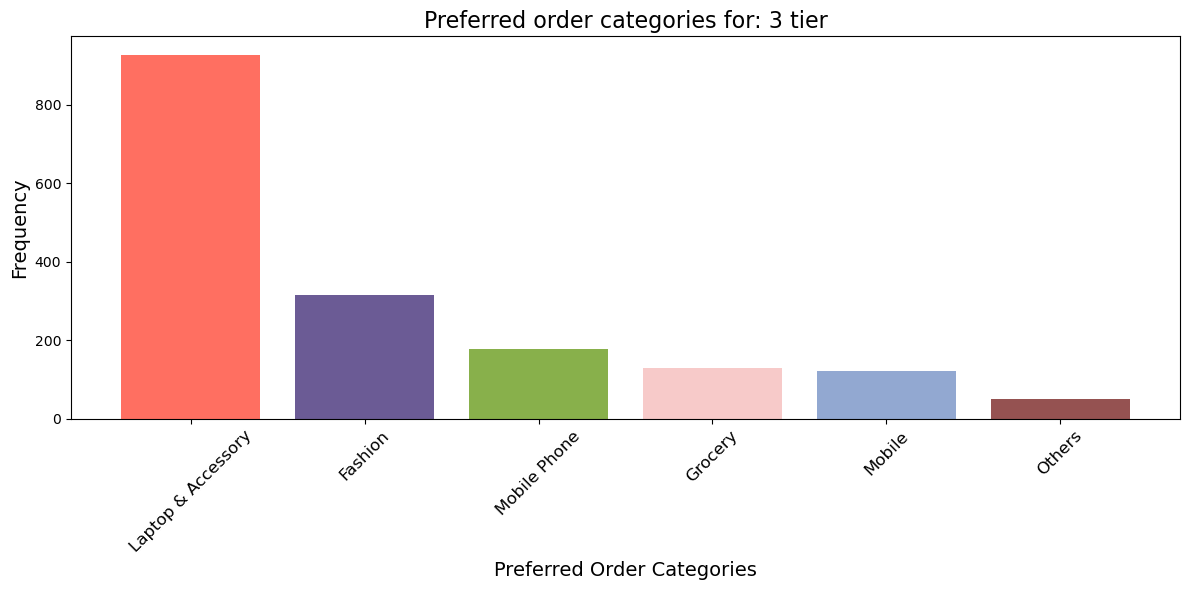

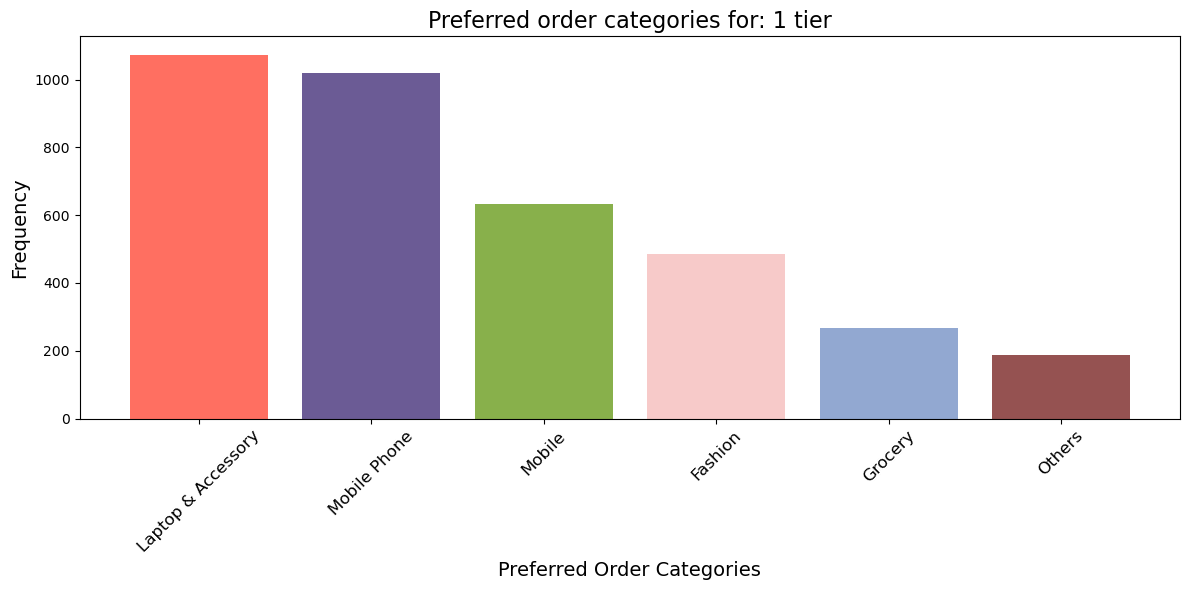

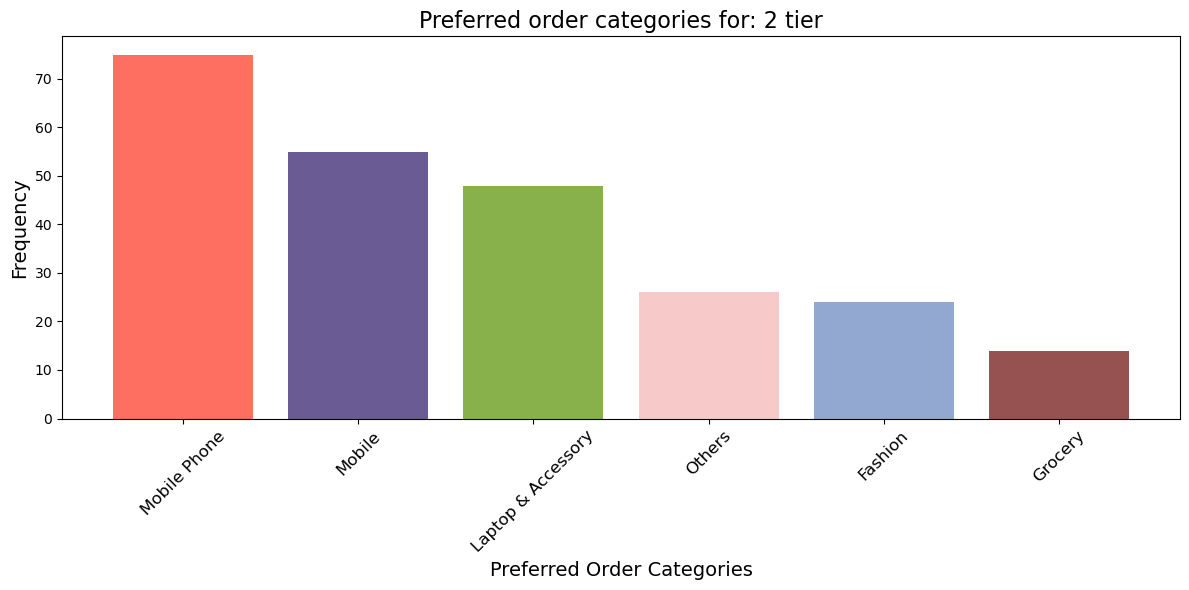

In [65]:
city_tiers = df['CityTier'].unique()

for tier in city_tiers:
    if tier:
        plt.figure(figsize=(12, 6))
        sub_df = df[df['CityTier'] == tier]
        frequency_counts = sub_df['PreferedOrderCat'].value_counts()
        plt.bar(frequency_counts.index, frequency_counts, color=['#ff6f61', '#6b5b95', '#88b04b', '#f7cac9', '#92a8d1', '#955251'])
        plt.title(f'Preferred order categories for: {tier} tier', fontsize=16)
        plt.xlabel('Preferred Order Categories', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.xticks(rotation=45, fontsize=12)
        plt.tight_layout()
        plt.show()

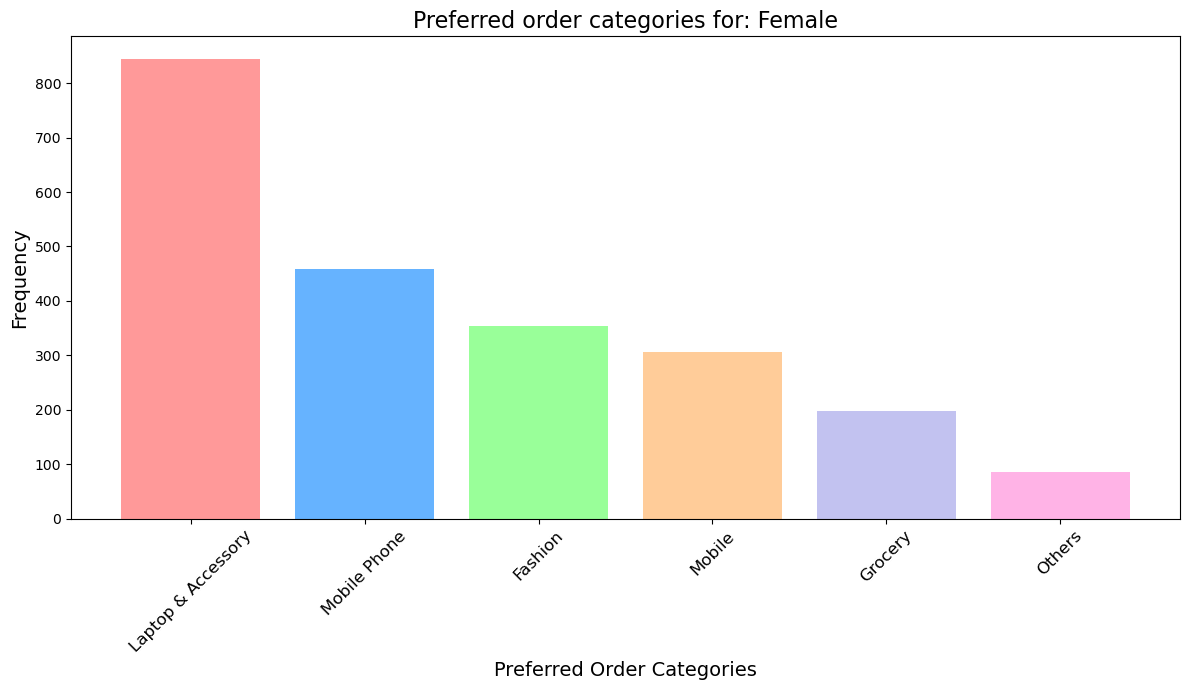

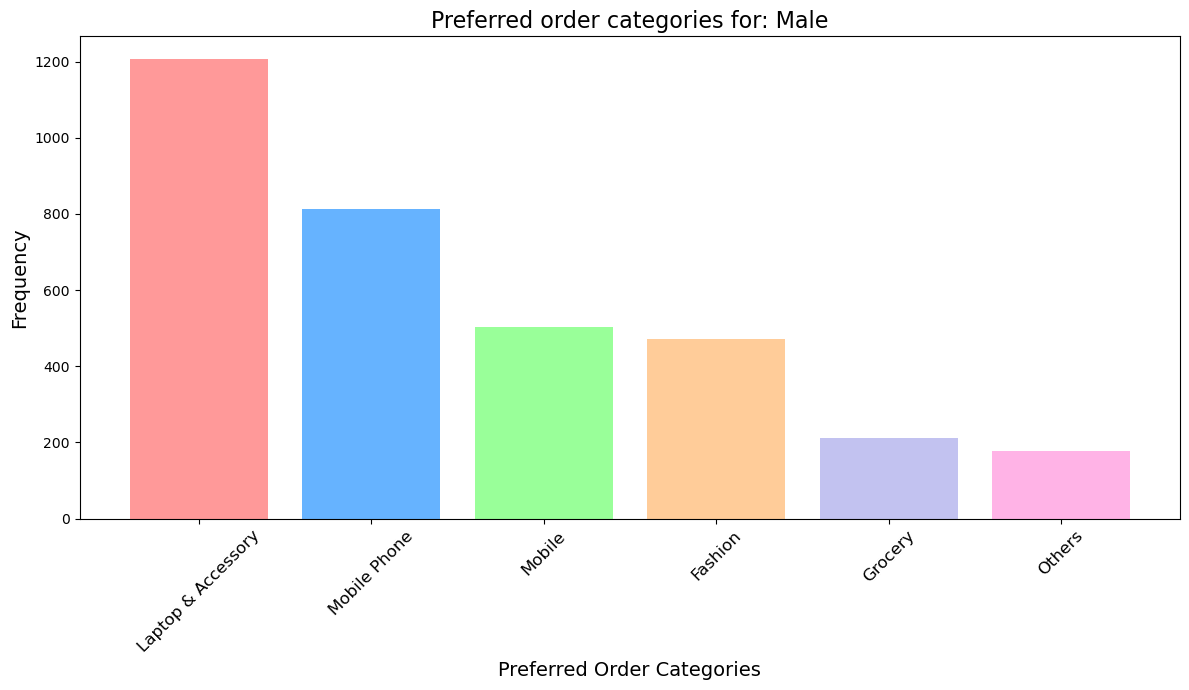

In [68]:
genders = df['Gender'].unique()

for gender in genders:
    if gender:
        plt.figure(figsize=(12, 7))
        sub_df = df[df['Gender'] == gender]
        frequency_counts = sub_df['PreferedOrderCat'].value_counts()
        plt.bar(frequency_counts.index, frequency_counts, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6'])
        plt.title(f'Preferred order categories for: {gender}', fontsize=16)
        plt.xlabel('Preferred Order Categories', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.xticks(rotation=45, fontsize=12)
        plt.tight_layout()
        plt.show()

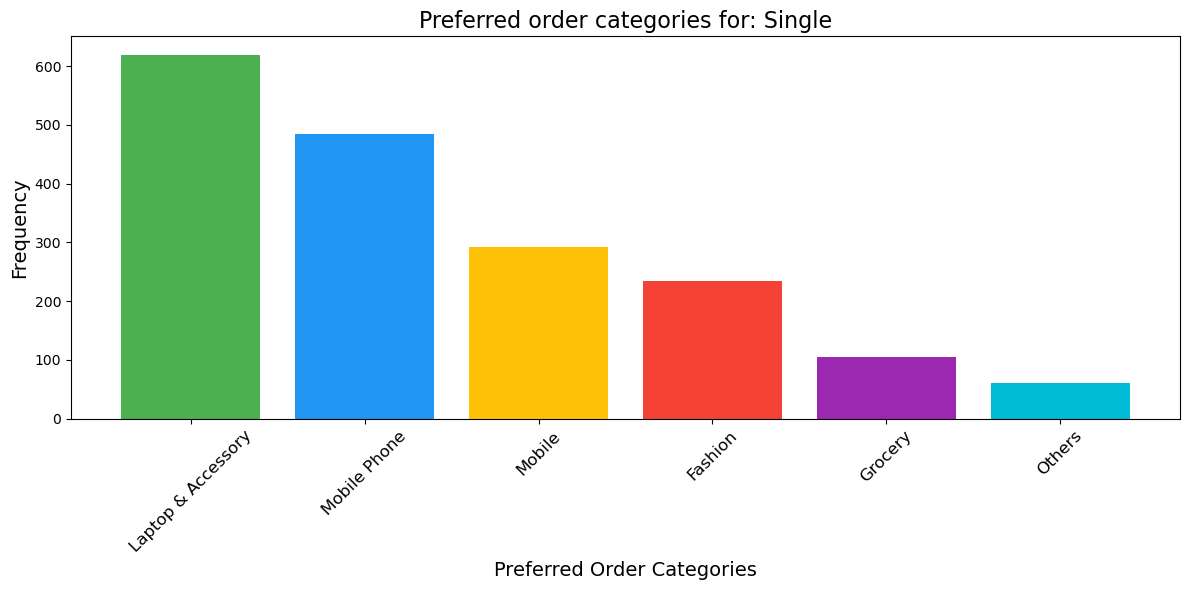

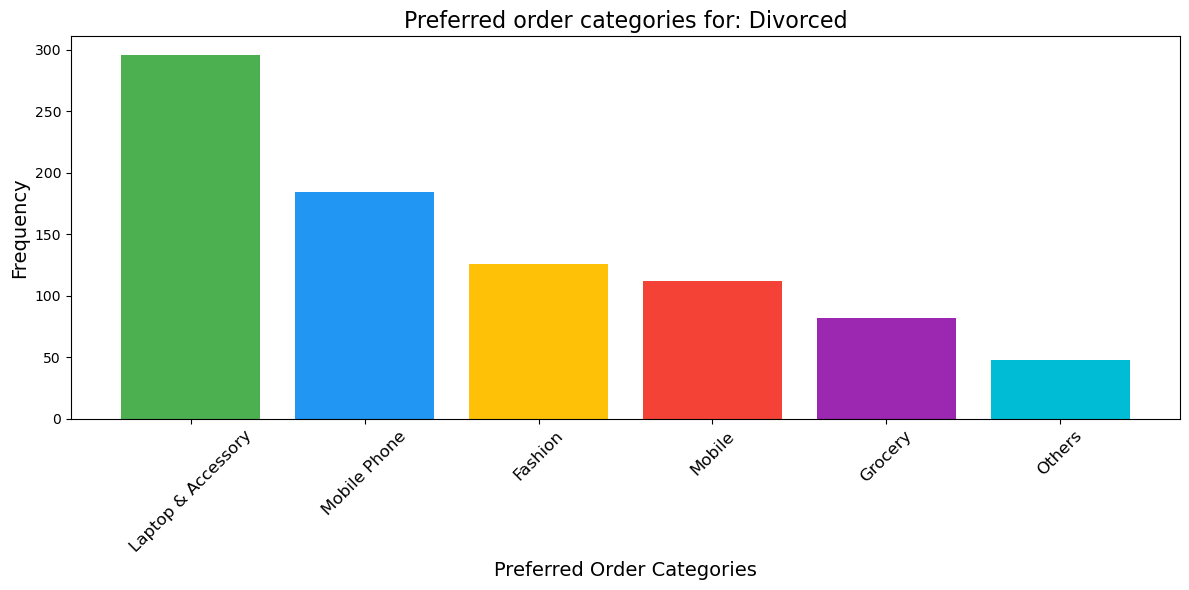

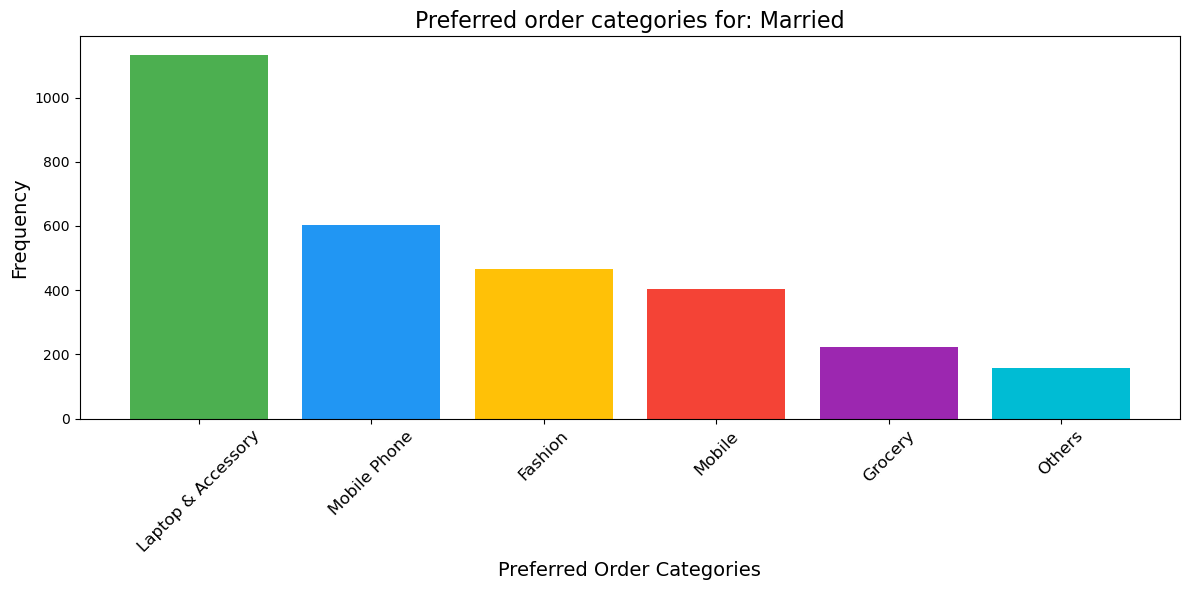

In [72]:
marital_status = df['MaritalStatus'].unique()

for status in marital_status:
    if status:
        plt.figure(figsize=(12, 6))
        sub_df = df[df['MaritalStatus'] == status]
        frequency_counts = sub_df['PreferedOrderCat'].value_counts()
        plt.bar(frequency_counts.index, frequency_counts, color=['#4CAF50', '#2196F3', '#FFC107', '#F44336', '#9C27B0', '#00BCD4'])
        plt.title(f'Preferred order categories for: {status}', fontsize=16)
        plt.xlabel('Preferred Order Categories', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.xticks(rotation=45, fontsize=12)
        plt.tight_layout()
        plt.show()

<h3>Conversion Analysis</h3>
Which Preferred Payment Modes Are More Successful in Conversion<br>

In [76]:
conversion_by_payment_mode = df.groupby('PreferredPaymentMode')['OrderCount'].mean().sort_values(ascending=False)
payment_mode = conversion_by_payment_mode.index.tolist() 
mean_order_count = conversion_by_payment_mode.values.tolist()

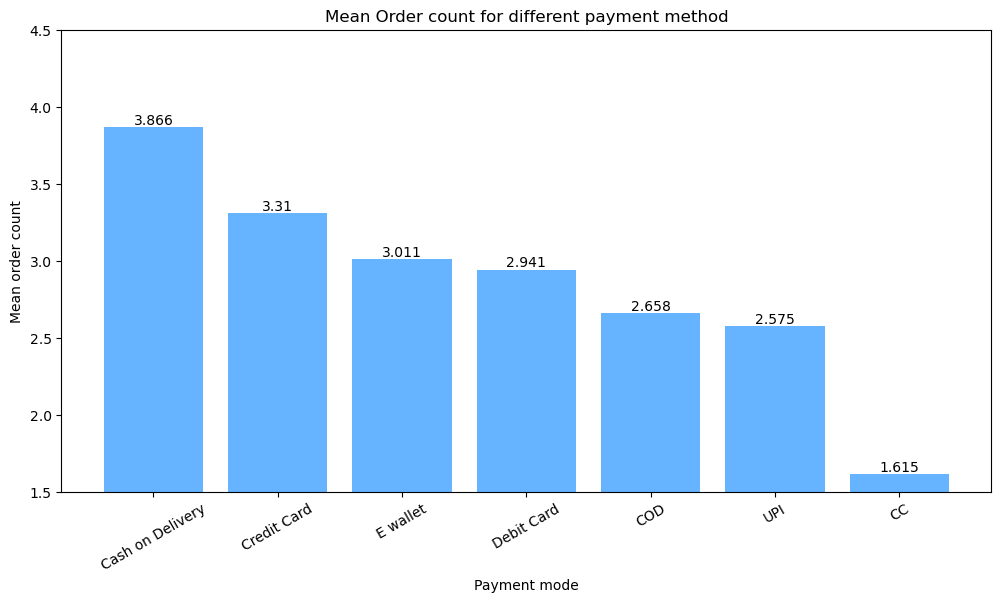

In [78]:
plt.figure(figsize=(12, 6))
bars = plt.bar(payment_mode, mean_order_count, color='#66b3ff')
plt.xlabel('Payment mode')
plt.ylabel('Mean order count')
plt.title('Mean Order count for different payment method')
plt.xticks(rotation=30)
plt.ylim(1.5, 4.5)
for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
plt.show()

How the Number of Hours Spent on the App (HourSpendOnApp) Influences Conversion?<br>

In [82]:
df['HourSpendOnApp'].describe()

count    5630.000000
mean        2.934636
std         0.705528
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: HourSpendOnApp, dtype: float64

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_9223/849859181.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_order_count_rate = df.groupby('HoursSpendOnAppGroup')['OrderCount'].mean().reset_index()
/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_9223/849859181.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='HoursSpendOnAppGroup', y='OrderCount', data=hours_order_count_rate, palette=['#ff6f61', '#6b5b95', '#88b04b'])


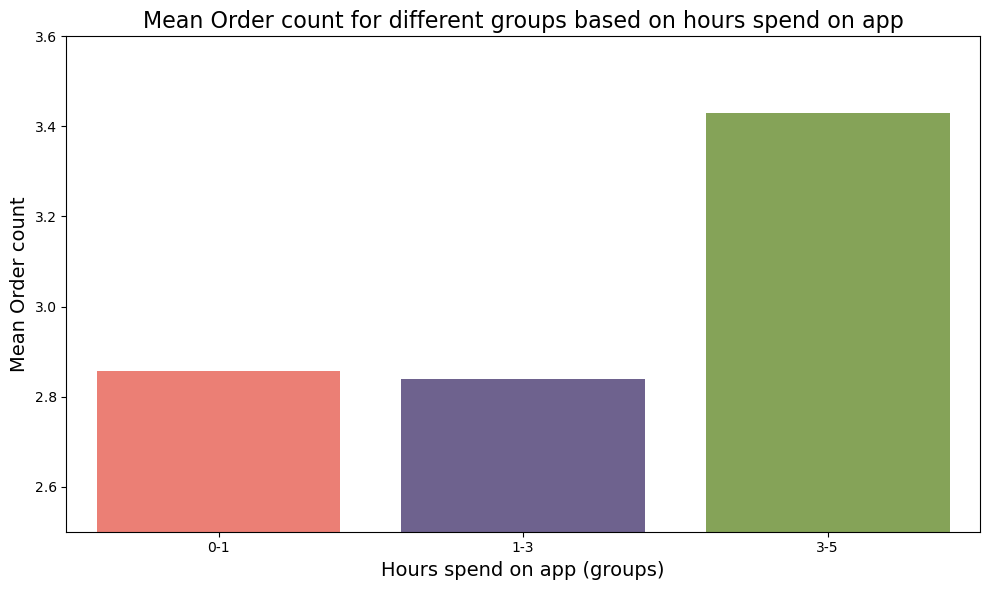

In [85]:
df['HoursSpendOnAppGroup'] = pd.cut(df['HourSpendOnApp'], bins=[0, 1, 3, 5], labels=['0-1', '1-3', '3-5'])

hours_order_count_rate = df.groupby('HoursSpendOnAppGroup')['OrderCount'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='HoursSpendOnAppGroup', y='OrderCount', data=hours_order_count_rate, palette=['#ff6f61', '#6b5b95', '#88b04b'])
plt.title("Mean Order count for different groups based on hours spend on app", fontsize=16)
plt.xlabel("Hours spend on app (groups)", fontsize=14)
plt.ylabel("Mean Order count", fontsize=14)
plt.ylim(2.5, 3.6)
plt.tight_layout()
plt.show()

Is there a relationship between the number of registered devices (NumberOfDeviceRegistered) and the conversion rate?<br>

In [88]:
df['NumberOfDeviceRegistered'].describe()

count    5630.000000
mean        3.688988
std         1.023999
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: NumberOfDeviceRegistered, dtype: float64

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_9223/2709105217.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  device_order_count_rate = df.groupby('NumberOfDeviceRegisteredGroup')['OrderCount'].mean().reset_index()
/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_9223/2709105217.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NumberOfDeviceRegisteredGroup', y='OrderCount', data=device_order_count_rate, palette=['#4CAF50', '#2196F3', '#FFC107'])


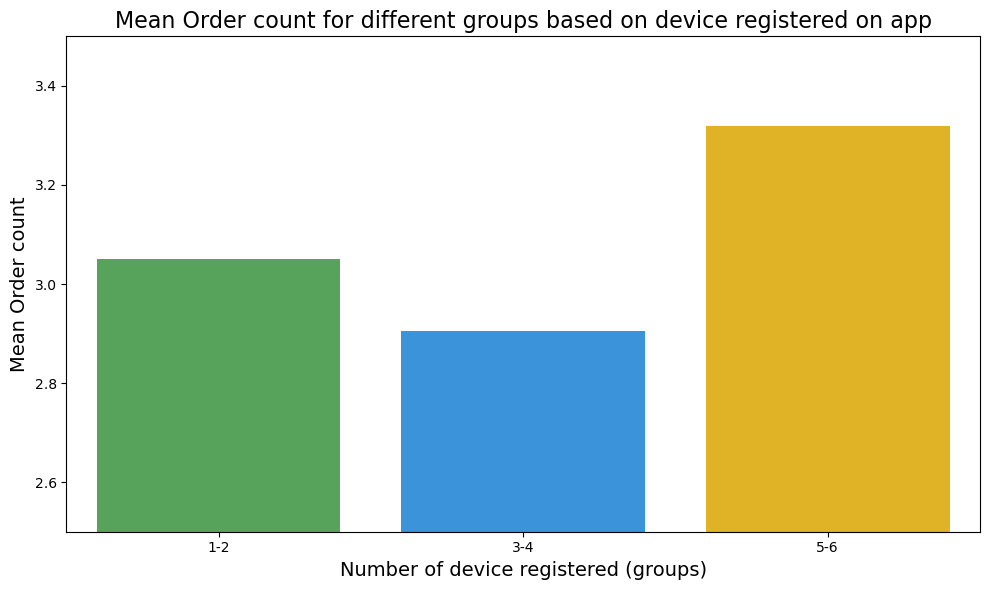

In [90]:
df['NumberOfDeviceRegisteredGroup'] = pd.cut(df['NumberOfDeviceRegistered'], bins=[1, 2, 4, 6], labels=['1-2', '3-4', '5-6'])

device_order_count_rate = df.groupby('NumberOfDeviceRegisteredGroup')['OrderCount'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='NumberOfDeviceRegisteredGroup', y='OrderCount', data=device_order_count_rate, palette=['#4CAF50', '#2196F3', '#FFC107'])
plt.title("Mean Order count for different groups based on device registered on app", fontsize=16)
plt.xlabel("Number of device registered (groups)", fontsize=14)
plt.ylabel("Mean Order count", fontsize=14)
plt.ylim(2.5, 3.5)
plt.tight_layout()
plt.show()

<h3>Customer Satisfaction Analysis</h3>
What Factors Influence High Levels of Customer Satisfaction (SatisfactionScore)?<br>

In [93]:
X = numeric_df.drop(columns=['SatisfactionScore'])
y = numeric_df['SatisfactionScore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Importance of factors:")
print(feature_importances)

Importance of factors:
                        Feature  Importance
12               CashbackAmount    0.176360
3               WarehouseToHome    0.141366
1                        Tenure    0.134764
8   OrderAmountHikeFromlastYear    0.103599
11            DaySinceLastOrder    0.099235
6               NumberOfAddress    0.086922
10                   OrderCount    0.057498
5      NumberOfDeviceRegistered    0.056198
9                    CouponUsed    0.045142
2                      CityTier    0.035977
4                HourSpendOnApp    0.031598
7                      Complain    0.020511
0                         Churn    0.010830


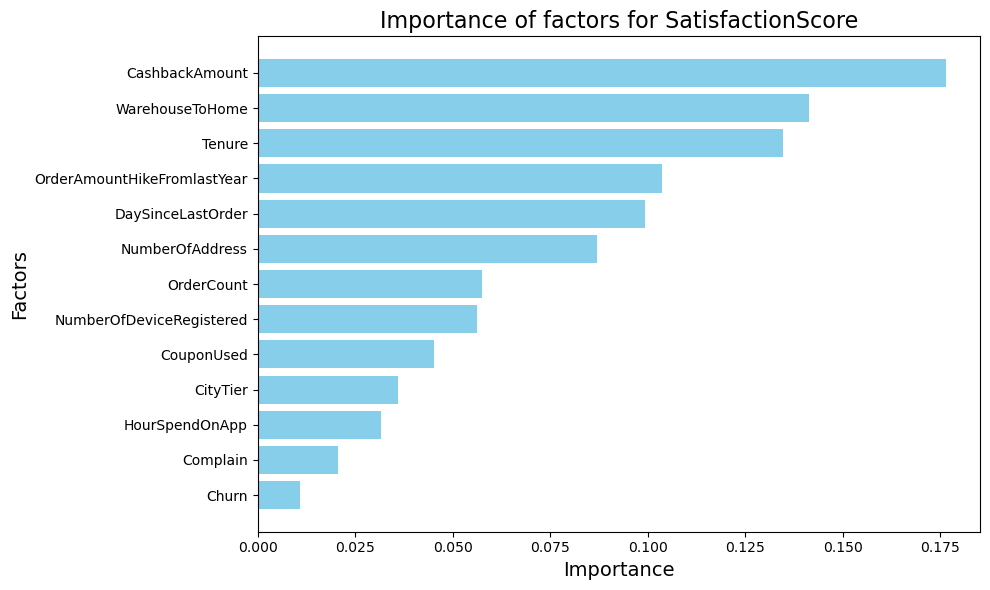

In [94]:
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.title('Importance of factors for SatisfactionScore', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Factors', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

How Complaints (Complain) Relate to Customer Satisfaction Levels?<br>

In [96]:
satisfaction_by_complaint = df.groupby('Complain')['SatisfactionScore'].mean().reset_index()
satisfaction_by_complaint

Complain  SatisfactionScore
0         0           3.093890
1         1           2.998753

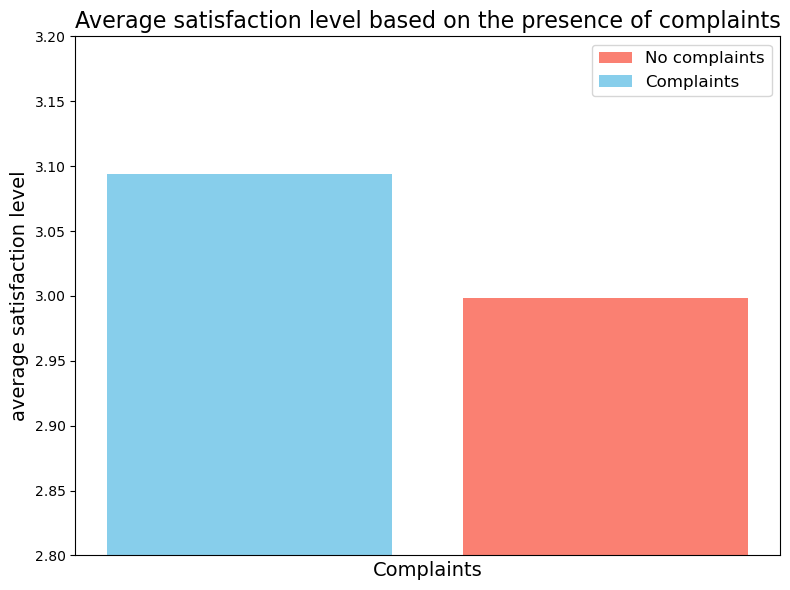

In [97]:
plt.figure(figsize=(8, 6))
plt.bar(satisfaction_by_complaint['Complain'], satisfaction_by_complaint['SatisfactionScore'], color=['skyblue', 'salmon']
)

legend_elements = [
    Patch(facecolor='salmon', label='No complaints'),
    Patch(facecolor='skyblue', label='Complaints')
]

plt.legend(handles=legend_elements, loc='upper right', fontsize=12)
plt.title('Average satisfaction level based on the presence of complaints', fontsize=16)
plt.xlabel('Complaints', fontsize=14)
plt.ylabel('average satisfaction level', fontsize=14)
plt.ylim(2.8, 3.2)
plt.xticks([])
plt.tight_layout()

In [98]:
correlation = df['Complain'].corr(df['SatisfactionScore'])
correlation

-0.031115486331220132

Is there a difference in satisfaction levels based on the customer's gender (Gender)?

In [105]:
satisfaction_by_gender = df.groupby('Gender')['SatisfactionScore'].mean().sort_values(ascending=False)
gender = satisfaction_by_gender.index.tolist() 
satisfaction = satisfaction_by_gender.values.tolist()

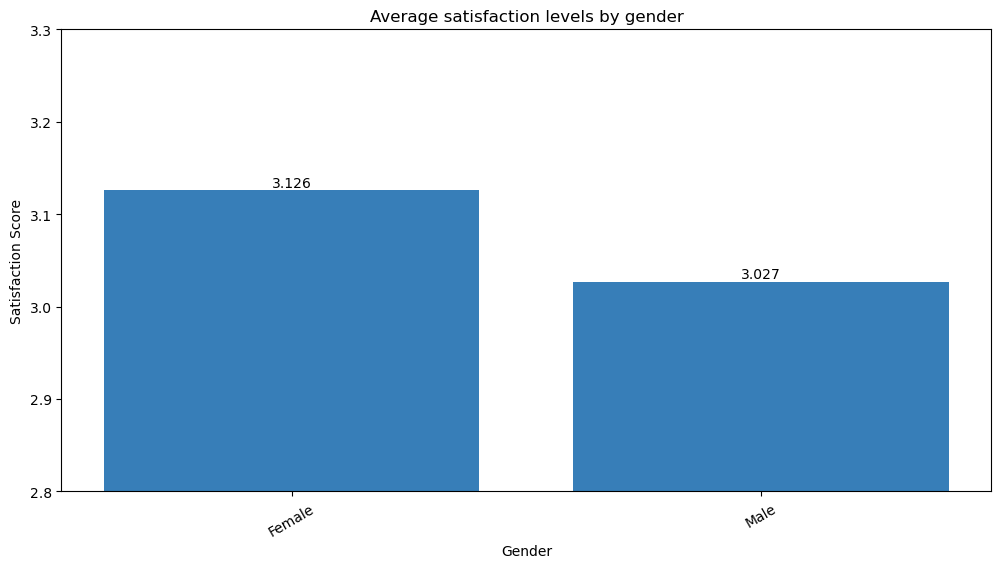

In [107]:
plt.figure(figsize=(12, 6))
bars = plt.bar(gender, satisfaction, color='#377eb8') #377eb8
plt.xlabel('Gender')
plt.ylabel('Satisfaction Score')
plt.title('Average satisfaction levels by gender')
plt.xticks(rotation=30)
plt.ylim(2.8, 3.3)

for bar in bars: 
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
plt.show()

<h3>Complaint Analysis</h3>
What factors most often lead to customer complaints?<br>

In [110]:
X = numeric_df.drop(columns=['Complain'])
y = numeric_df['Complain']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeClassifier(random_state=42, max_depth=5)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

print("Classification report:")
print(classification_report(y_test, y_pred))

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Importance of factors:")
print(feature_importances)

Classification report:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       815
           1       0.61      0.23      0.33       311

    accuracy                           0.75      1126
   macro avg       0.68      0.59      0.59      1126
weighted avg       0.72      0.75      0.70      1126

Importance of factors:
                        Feature  Importance
0                         Churn    0.471195
1                        Tenure    0.114118
2                      CityTier    0.078330
3               WarehouseToHome    0.075348
8   OrderAmountHikeFromlastYear    0.050237
7               NumberOfAddress    0.049091
6             SatisfactionScore    0.044305
10                   OrderCount    0.039604
12               CashbackAmount    0.038775
4                HourSpendOnApp    0.024479
5      NumberOfDeviceRegistered    0.014516
9                    CouponUsed    0.000000
11            DaySinceLastOrder    0.000000


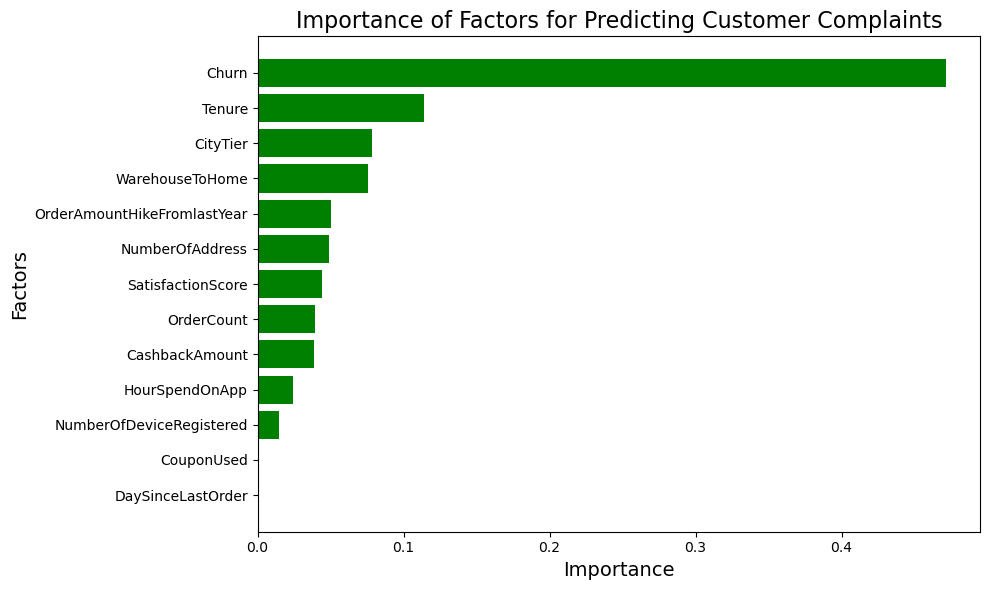

In [112]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='green')
plt.title('Importance of Factors for Predicting Customer Complaints', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Factors', fontsize=14)
plt.tight_layout()
plt.gca().invert_yaxis()

plt.show()

How does the number of days since the last order (DaySinceLastOrder) affect the likelihood of filing a complaint?


In [115]:
df['DaySinceLastOrder'].describe()

count    5630.000000
mean        4.459325
std         3.570626
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        46.000000
Name: DaySinceLastOrder, dtype: float64

In [117]:
df['LastOrderGroup'] = pd.cut(df['DaySinceLastOrder'], bins=[0, 10, 20, 50,], labels=['0-10', '10-20', '20+'])
group_analysis = df.groupby('LastOrderGroup')['Complain'].mean().reset_index()
group_analysis

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_9223/3117888745.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_analysis = df.groupby('LastOrderGroup')['Complain'].mean().reset_index()


LastOrderGroup  Complain
0           0-10  0.283050
1          10-20  0.268852
2            20+  0.000000

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_9223/2686107604.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='LastOrderGroup', y='Complain', data=group_analysis, palette=['#377eb8', '#4daf4a'])
/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_9223/2686107604.py:2: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  barplot = sns.barplot(x='LastOrderGroup', y='Complain', data=group_analysis, palette=['#377eb8', '#4daf4a'])


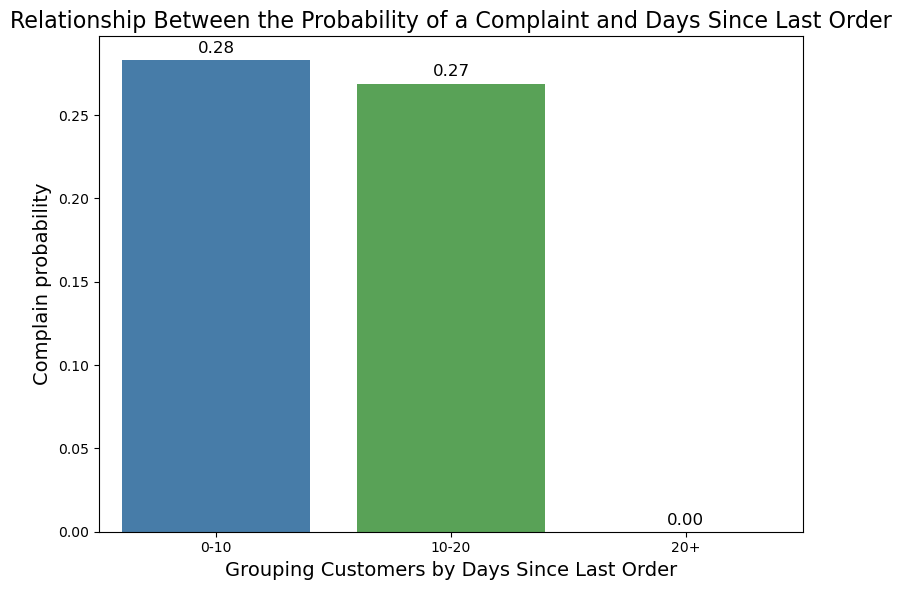

In [118]:
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='LastOrderGroup', y='Complain', data=group_analysis, palette=['#377eb8', '#4daf4a'])

for i in barplot.containers:
    barplot.bar_label(i, fmt='%.2f', label_type='edge', fontsize=12, padding=3)
    
plt.title('Relationship Between the Probability of a Complaint and Days Since Last Order', fontsize=16)
plt.xlabel('Grouping Customers by Days Since Last Order', fontsize=14)
plt.ylabel('Complain probability', fontsize=14)
plt.tight_layout()
plt.show()

How does the percentage increase in orders from last year (OrderAmountHikeFromlastYear) relate to the number of complaints?


In [122]:
df['OrderAmountHikeFromlastYear'].describe()

count    5630.000000
mean       15.674600
std         3.591058
min        11.000000
25%        13.000000
50%        15.000000
75%        18.000000
max        26.000000
Name: OrderAmountHikeFromlastYear, dtype: float64

In [124]:
df['YearHikeGroup'] = pd.cut(df['OrderAmountHikeFromlastYear'], bins=[0, 15, 20, 30], labels=['0-15', '15-20', '20+'])
group_analysis = df.groupby('YearHikeGroup')['Complain'].mean().reset_index()
group_analysis

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_9223/4205175972.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_analysis = df.groupby('YearHikeGroup')['Complain'].mean().reset_index()


YearHikeGroup  Complain
0          0-15  0.291776
1         15-20  0.262458
2           20+  0.299435

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_9223/2649507799.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='YearHikeGroup', y='Complain', data=group_analysis, palette=['#377eb8', '#4daf4a', '#ffff33'])


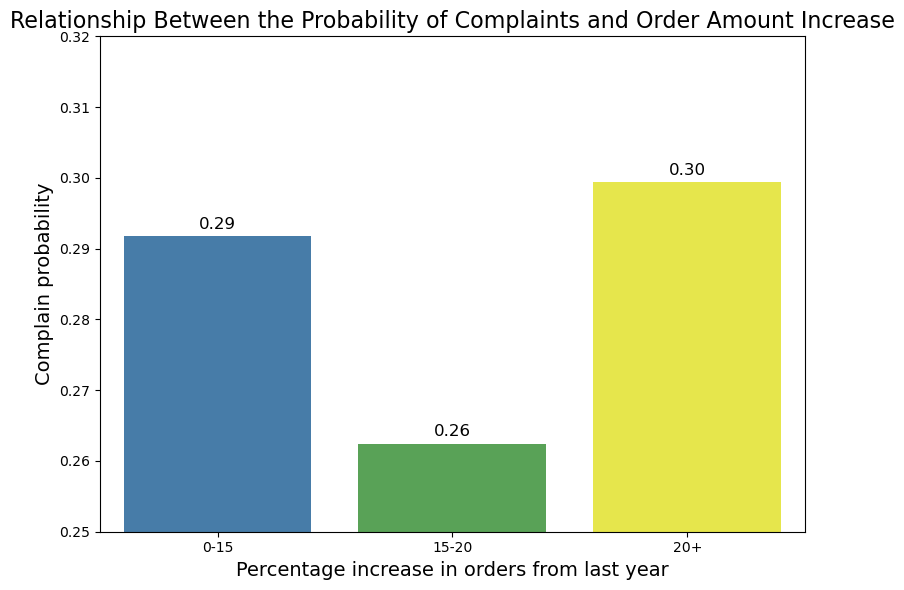

In [126]:
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='YearHikeGroup', y='Complain', data=group_analysis, palette=['#377eb8', '#4daf4a', '#ffff33'])

for i in barplot.containers:
    barplot.bar_label(i, fmt='%.2f', label_type='edge', fontsize=12, padding=3)
    
plt.title('Relationship Between the Probability of Complaints and Order Amount Increase', fontsize=16)
plt.xlabel('Percentage increase in orders from last year', fontsize=14)
plt.ylabel('Complain probability', fontsize=14)
plt.tight_layout()
plt.ylim(0.25, 0.32)
plt.show()

<h3>User Behavior Analysis</h3>
How the Number of Registered Devices (NumberOfDeviceRegistered) Influences User Behavior?

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_9223/749836930.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  device_churn_rate = df.groupby('NumberOfDeviceRegisteredGroup')['Churn'].mean().reset_index()
/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_9223/749836930.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NumberOfDeviceRegisteredGroup', y='Churn', data=device_churn_rate, palette=['#4CAF50', '#2196F3', '#FFC107'])


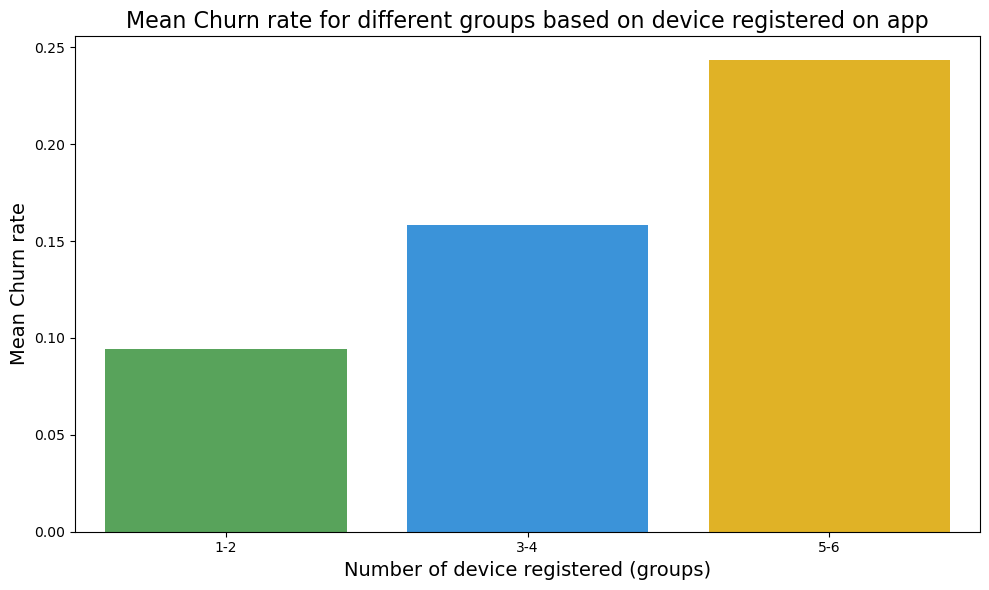

In [129]:
device_churn_rate = df.groupby('NumberOfDeviceRegisteredGroup')['Churn'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='NumberOfDeviceRegisteredGroup', y='Churn', data=device_churn_rate, palette=['#4CAF50', '#2196F3', '#FFC107'])
plt.title("Mean Churn rate for different groups based on device registered on app", fontsize=16)
plt.xlabel("Number of device registered (groups)", fontsize=14)
plt.ylabel("Mean Churn rate", fontsize=14)
# plt.ylim(2.5, 3.5)
plt.tight_layout()
plt.show()

How Does User Behavior Change Depending on the Distance Between the Warehouse and the Home (WarehouseToHome)?

In [132]:
df['WarehouseToHome'].describe()

count    5630.000000
mean       15.566785
std         8.345961
min         5.000000
25%         9.000000
50%        14.000000
75%        20.000000
max       127.000000
Name: WarehouseToHome, dtype: float64

In [134]:
df['WarehouseToHomeGroup'] = pd.cut(df['WarehouseToHome'], bins=[5, 25, 50, 75, 100, 130], labels=['5-25 km', '25-50 km', '50-75 km', '75-100 km', '100-126 km'])
group_analysis = df.groupby('WarehouseToHomeGroup')['Churn'].mean().reset_index()

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_9223/2894683589.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_analysis = df.groupby('WarehouseToHomeGroup')['Churn'].mean().reset_index()


/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_9223/157121045.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='WarehouseToHomeGroup', y='Churn', data=group_analysis, palette=['#4CAF50', '#2196F3', '#FFC107'])
/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_9223/157121045.py:2: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='WarehouseToHomeGroup', y='Churn', data=group_analysis, palette=['#4CAF50', '#2196F3', '#FFC107'])


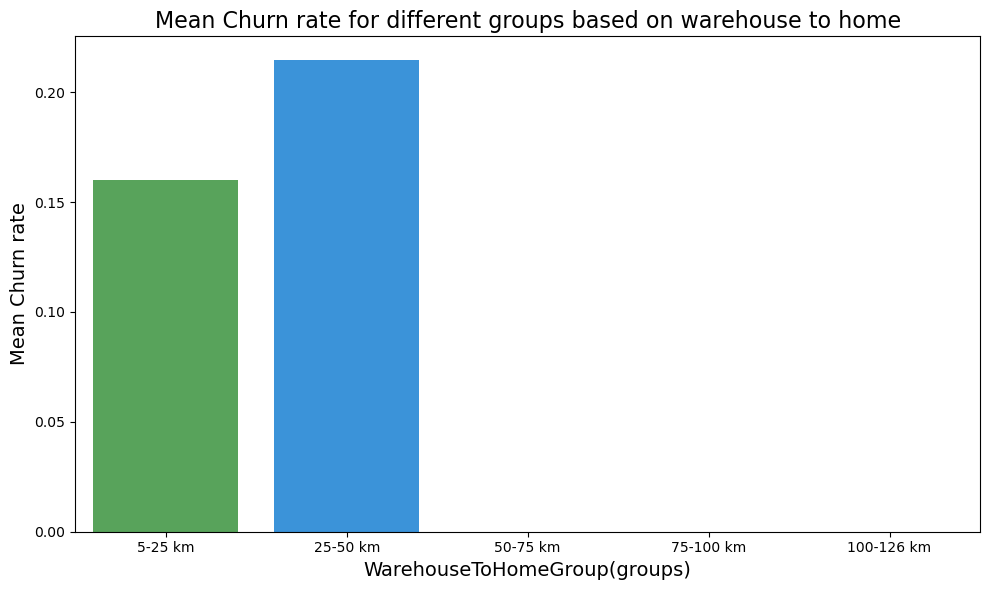

In [136]:
plt.figure(figsize=(10, 6))
sns.barplot(x='WarehouseToHomeGroup', y='Churn', data=group_analysis, palette=['#4CAF50', '#2196F3', '#FFC107'])
plt.title("Mean Churn rate for different groups based on warehouse to home", fontsize=16)
plt.xlabel("WarehouseToHomeGroup(groups)", fontsize=14)
plt.ylabel("Mean Churn rate", fontsize=14)
plt.tight_layout()
plt.show()

How does user churn change based on the number of added customer addresses (NumberOfAddress)?

In [139]:
df['NumberOfAddress'].describe()

count    5630.000000
mean        4.214032
std         2.583586
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        22.000000
Name: NumberOfAddress, dtype: float64

In [141]:
df['AddressGroup'] = pd.cut(df['NumberOfAddress'], bins=[1, 5, 10, 15, 20, 22],
                            labels=['1-5 addresses', '6-10 addresses', '11-15 addresses', '16-20 addresses', '21-22 addresses'])
group_analysis = df.groupby('AddressGroup')['Churn'].mean().reset_index()
group_analysis

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_9223/1157714355.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_analysis = df.groupby('AddressGroup')['Churn'].mean().reset_index()


AddressGroup     Churn
0    1-5 addresses  0.157909
1   6-10 addresses  0.205033
2  11-15 addresses  0.234694
3  16-20 addresses  1.000000
4  21-22 addresses  0.000000

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_9223/3676435624.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AddressGroup', y='Churn', data=group_analysis, palette=['#4CAF50', '#2196F3', '#FFC107', '#ff6f61'])
/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_9223/3676435624.py:2: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='AddressGroup', y='Churn', data=group_analysis, palette=['#4CAF50', '#2196F3', '#FFC107', '#ff6f61'])


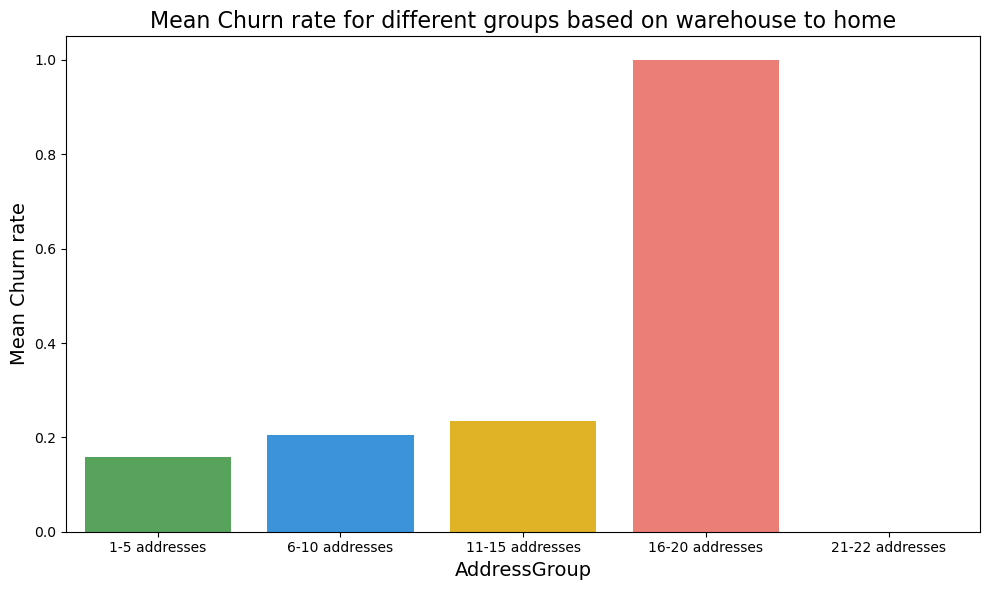

In [143]:
plt.figure(figsize=(10, 6))
sns.barplot(x='AddressGroup', y='Churn', data=group_analysis, palette=['#4CAF50', '#2196F3', '#FFC107', '#ff6f61'])
plt.title("Mean Churn rate for different groups based on warehouse to home", fontsize=16)
plt.xlabel("AddressGroup", fontsize=14)
plt.ylabel("Mean Churn rate", fontsize=14)
plt.tight_layout()
plt.show()

<h3>Order Growth Analysis</h3>
What factors contribute to the growth of orders?

In [146]:
df['OrderCount'].describe()

count    5630.000000
mean        2.961812
std         2.879248
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: OrderCount, dtype: float64

In [148]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [150]:
X = numeric_df.drop(columns=['OrderCount'])
y = numeric_df['OrderCount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Importance of factors:")
print(feature_importances)

Importance of factors:
                        Feature  Importance
10                   CouponUsed    0.441523
12               CashbackAmount    0.174987
11            DaySinceLastOrder    0.089406
3               WarehouseToHome    0.057993
1                        Tenure    0.053857
9   OrderAmountHikeFromlastYear    0.046939
7               NumberOfAddress    0.038556
6             SatisfactionScore    0.030015
5      NumberOfDeviceRegistered    0.021760
4                HourSpendOnApp    0.016867
2                      CityTier    0.013698
8                      Complain    0.008885
0                         Churn    0.005514


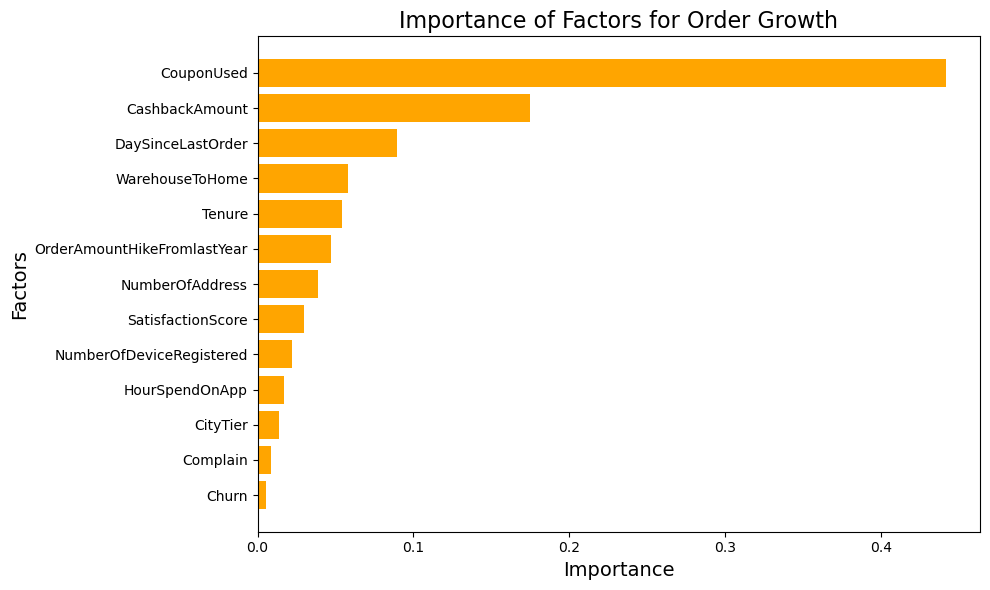

In [151]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='orange')
plt.title('Importance of Factors for Order Growth', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Factors', fontsize=14)
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

How does the use of coupons (CouponUsed) affect the number of orders?

In [153]:
df['CouponUsed'].describe()

count    5630.000000
mean        1.716874
std         1.857640
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        16.000000
Name: CouponUsed, dtype: float64

In [155]:
df['CouponUsedGroup'] = pd.cut(df['CouponUsed'], bins=[0, 4, 8, 12, 16],
                           labels=['0-4 coupon', '5-8 coupon', '9-12 coupon', '13-16 coupon'], include_lowest=True)
group_analysis = df.groupby('CouponUsedGroup')['OrderCount'].mean().reset_index()
group_analysis

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_9223/2854901831.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_analysis = df.groupby('CouponUsedGroup')['OrderCount'].mean().reset_index()


CouponUsedGroup  OrderCount
0      0-4 coupon    2.515006
1      5-8 coupon    7.777174
2     9-12 coupon   11.354167
3    13-16 coupon   12.187500

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_9223/225996141.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CouponUsedGroup', y='OrderCount', data=group_analysis, palette=['#4CAF50', '#2196F3', '#FFC107', '#ff6f61'])


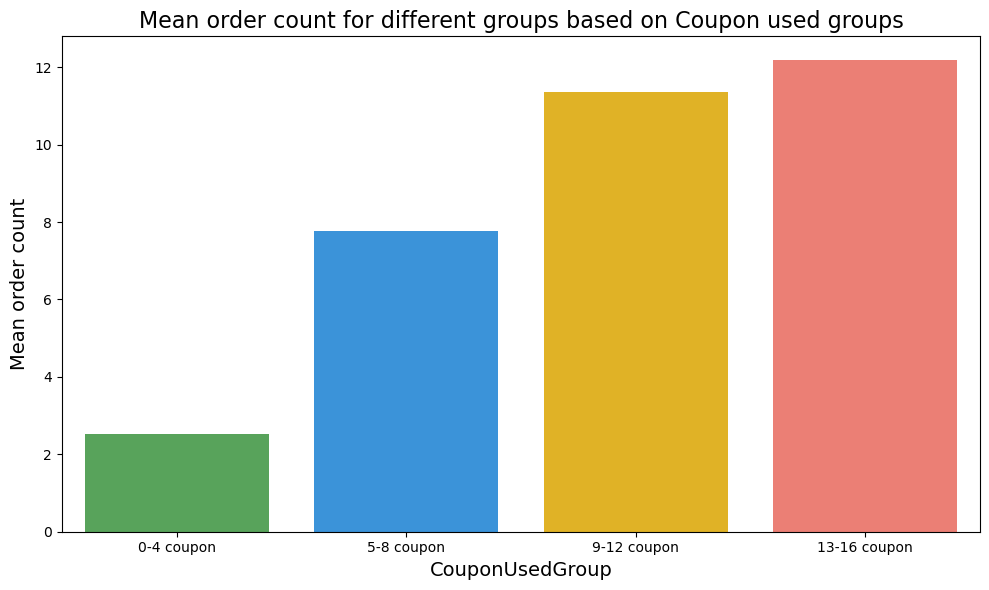

In [159]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CouponUsedGroup', y='OrderCount', data=group_analysis, palette=['#4CAF50', '#2196F3', '#FFC107', '#ff6f61'])
plt.title("Mean order count for different groups based on Coupon used groups", fontsize=16)
plt.xlabel("CouponUsedGroup", fontsize=14)
plt.ylabel("Mean order count", fontsize=14)
plt.tight_layout()
plt.show()

Is there a relationship between the average cashback amount (CashbackAmount) and order growth?

In [162]:
df['CashbackAmount'].describe()

count    5630.000000
mean      177.221492
std        49.193869
min         0.000000
25%       146.000000
50%       163.000000
75%       196.000000
max       325.000000
Name: CashbackAmount, dtype: float64

In [164]:
df['CashbackGroup'] = pd.cut(df['CashbackAmount'], bins=[0, 65, 130, 195, 260, 325],
                             labels=['0-65', '66-130', '131-195', '196-260', '261-325'],
                             include_lowest=True)
group_analysis = df.groupby('CashbackGroup')['OrderCount'].mean().reset_index()
group_analysis

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_9223/740877937.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_analysis = df.groupby('CashbackGroup')['OrderCount'].mean().reset_index()


CashbackGroup  OrderCount
0          0-65    5.818182
1        66-130    1.667979
2       131-195    2.676977
3       196-260    3.653061
4       261-325    5.372263

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_9223/2439140302.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CashbackGroup', y='OrderCount', data=group_analysis, palette=['#ff6f61', '#6b5b95', '#88b04b', '#f7cac9', '#92a8d1'])


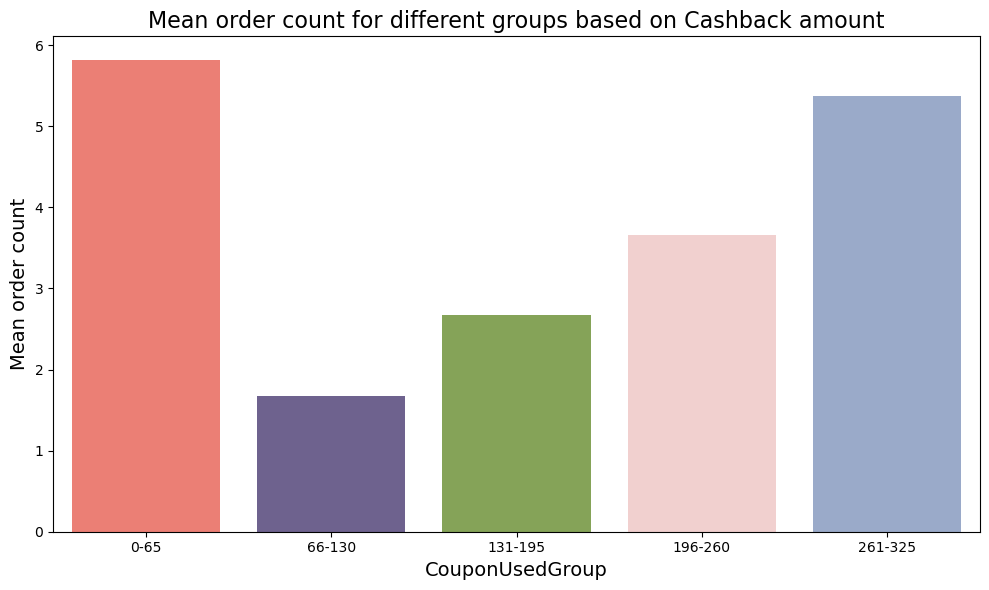

In [166]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CashbackGroup', y='OrderCount', data=group_analysis, palette=['#ff6f61', '#6b5b95', '#88b04b', '#f7cac9', '#92a8d1'])
plt.title("Mean order count for different groups based on Cashback amount", fontsize=16)
plt.xlabel("CouponUsedGroup", fontsize=14)
plt.ylabel("Mean order count", fontsize=14)
plt.tight_layout()
plt.show()

<h3>Cashback Analysis</h3>
What factors influence the number of cashbacks?

In [169]:
X = numeric_df.drop(columns=['CashbackAmount'])
y = numeric_df['CashbackAmount'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Importance of factors:")
print(feature_importances)

Importance of factors:
                        Feature  Importance
1                        Tenure    0.311339
12            DaySinceLastOrder    0.129264
9   OrderAmountHikeFromlastYear    0.117142
11                   OrderCount    0.106856
3               WarehouseToHome    0.082920
7               NumberOfAddress    0.070079
6             SatisfactionScore    0.040556
10                   CouponUsed    0.039145
5      NumberOfDeviceRegistered    0.030252
4                HourSpendOnApp    0.025081
2                      CityTier    0.023602
8                      Complain    0.014904
0                         Churn    0.008861


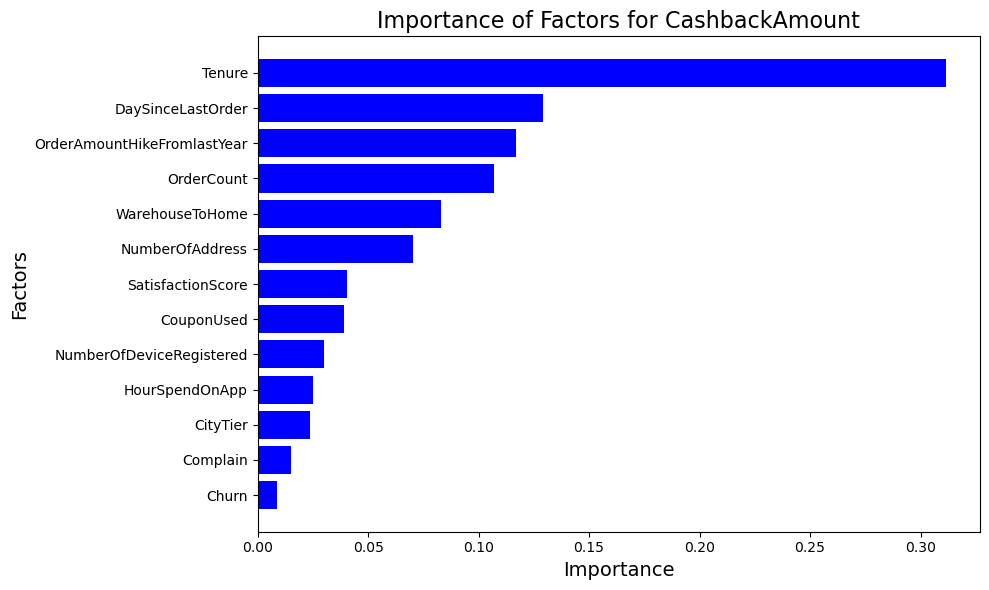

In [170]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='blue')
plt.title('Importance of Factors for CashbackAmount', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Factors', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

How does the distribution of cashbacks (CashbackAmount) differ across various customer segments?

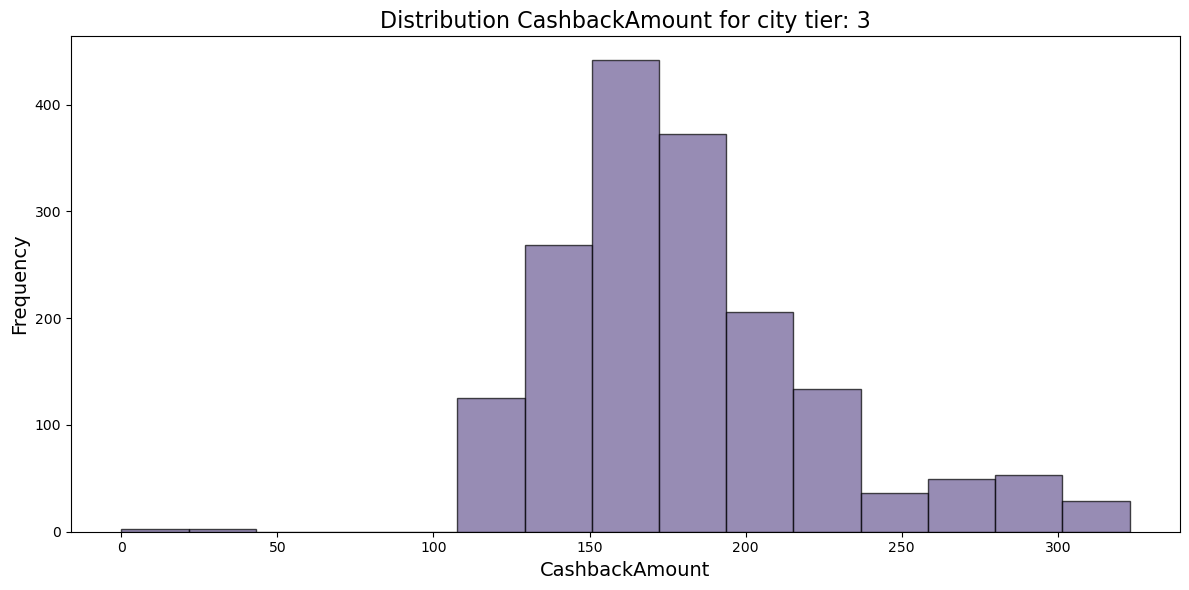

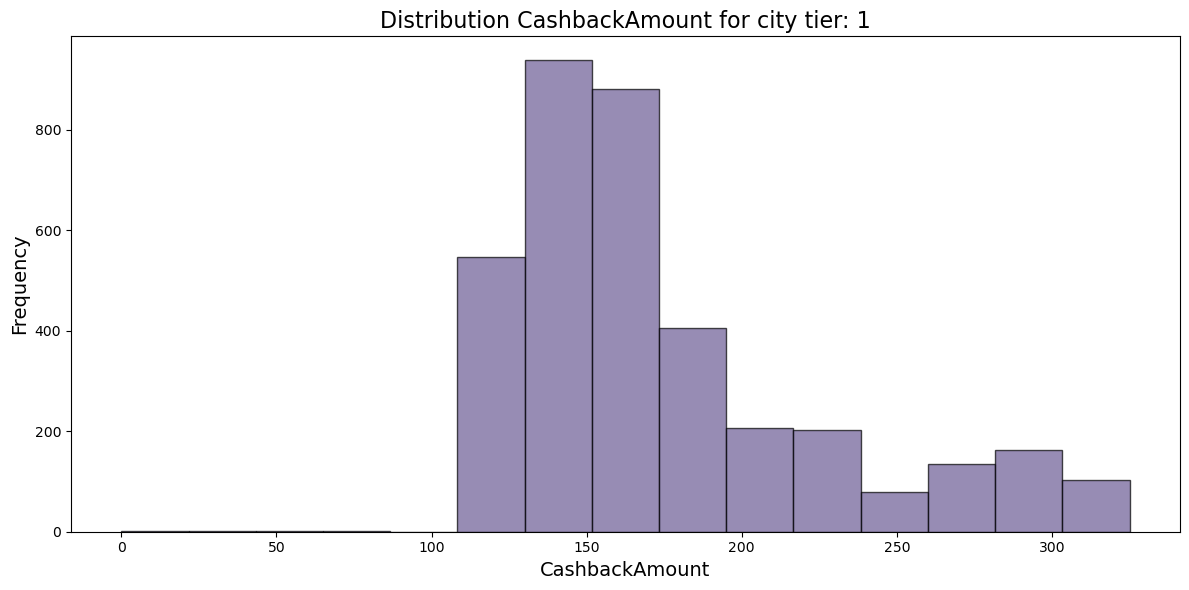

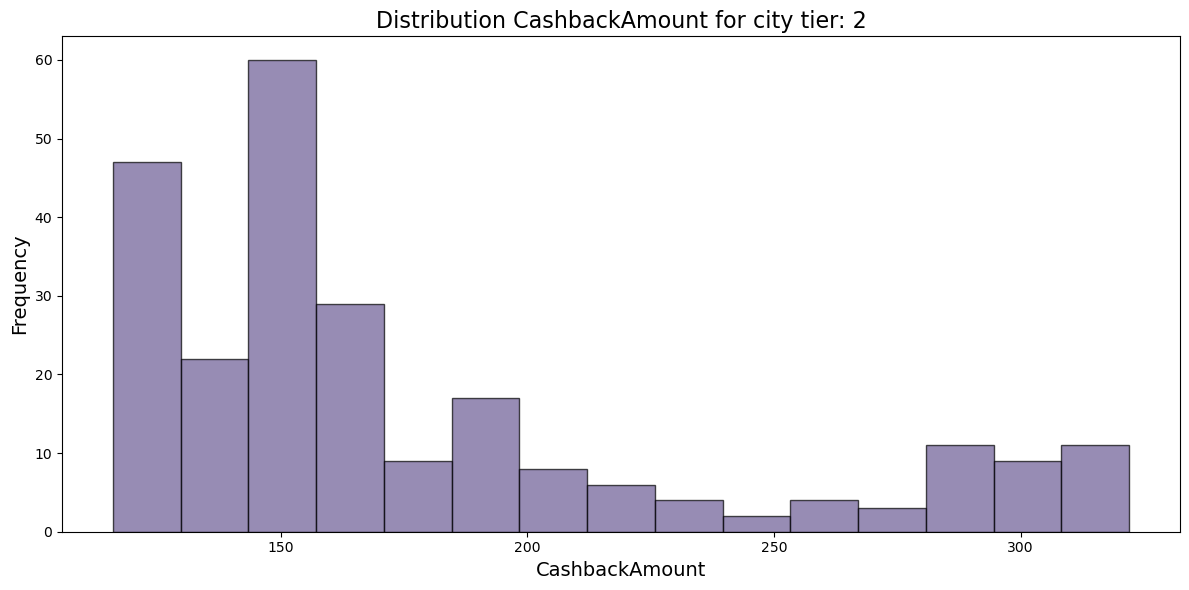

In [172]:
for tier in city_tiers:
    if tier:
        plt.figure(figsize=(12, 6))
        
        sub_df = df[df['CityTier'] == tier]
        
        plt.hist(sub_df['CashbackAmount'], bins=15, color='#6b5b95', alpha=0.7, edgecolor='black')
        
        plt.title(f'Distribution CashbackAmount for city tier: {tier}', fontsize=16)
        plt.xlabel('CashbackAmount', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.tight_layout()
        plt.show()

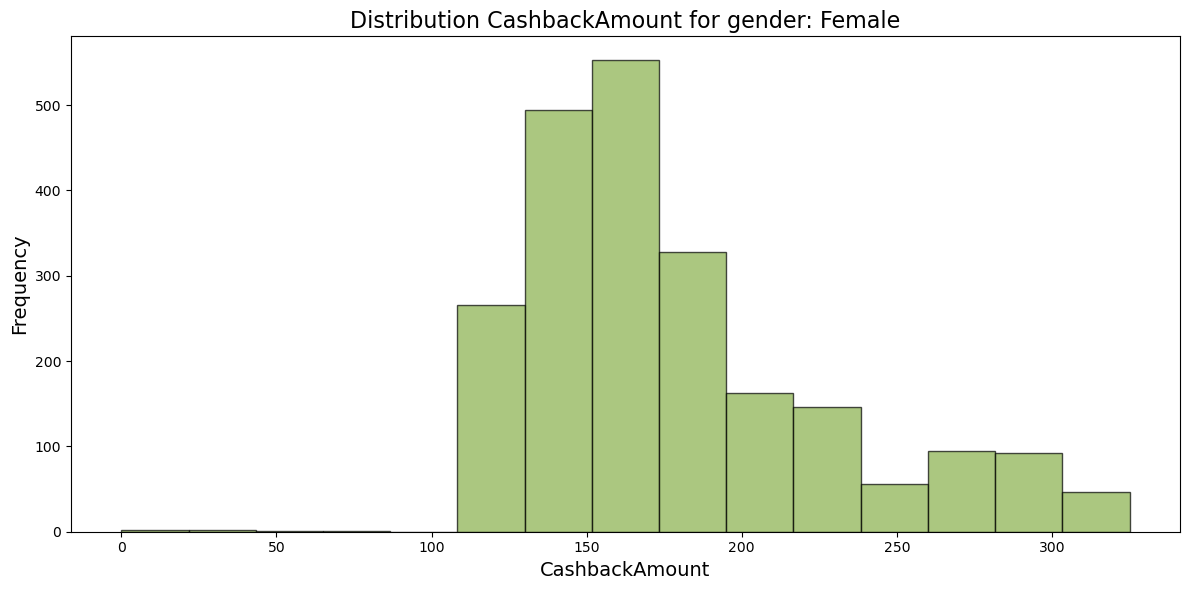

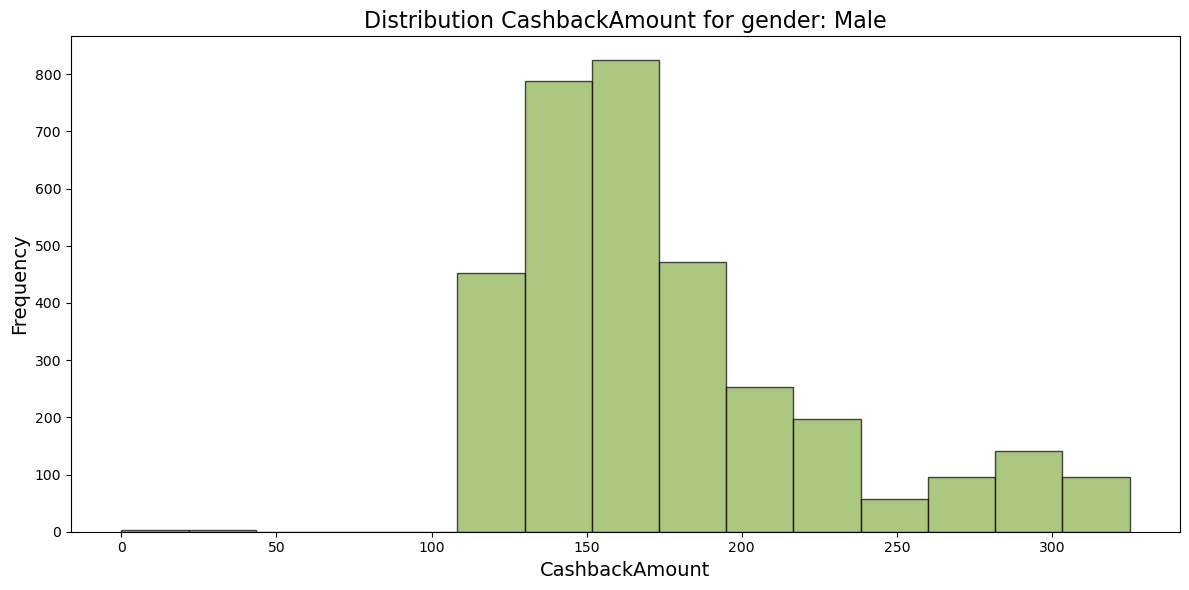

In [173]:
for gender in genders:
    if gender:
        plt.figure(figsize=(12, 6))
        
        sub_df = df[df['Gender'] == gender]
        
        plt.hist(sub_df['CashbackAmount'], bins=15, color='#88b04b', alpha=0.7, edgecolor='black')
        
        plt.title(f'Distribution CashbackAmount for gender: {gender}', fontsize=16)
        plt.xlabel('CashbackAmount', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.tight_layout()
        plt.show()

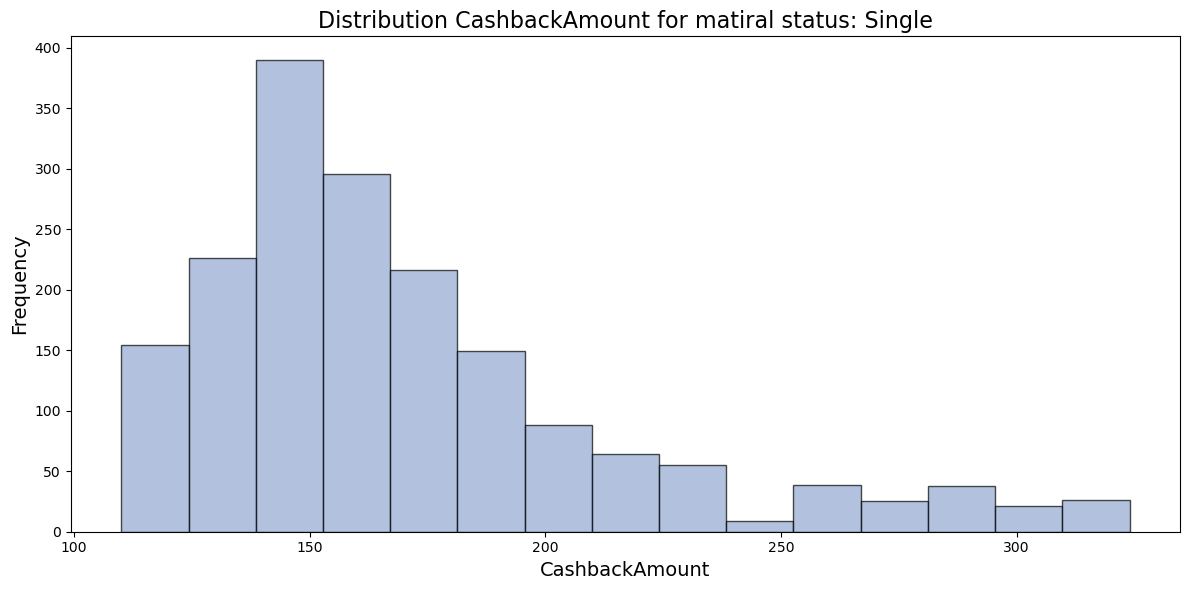

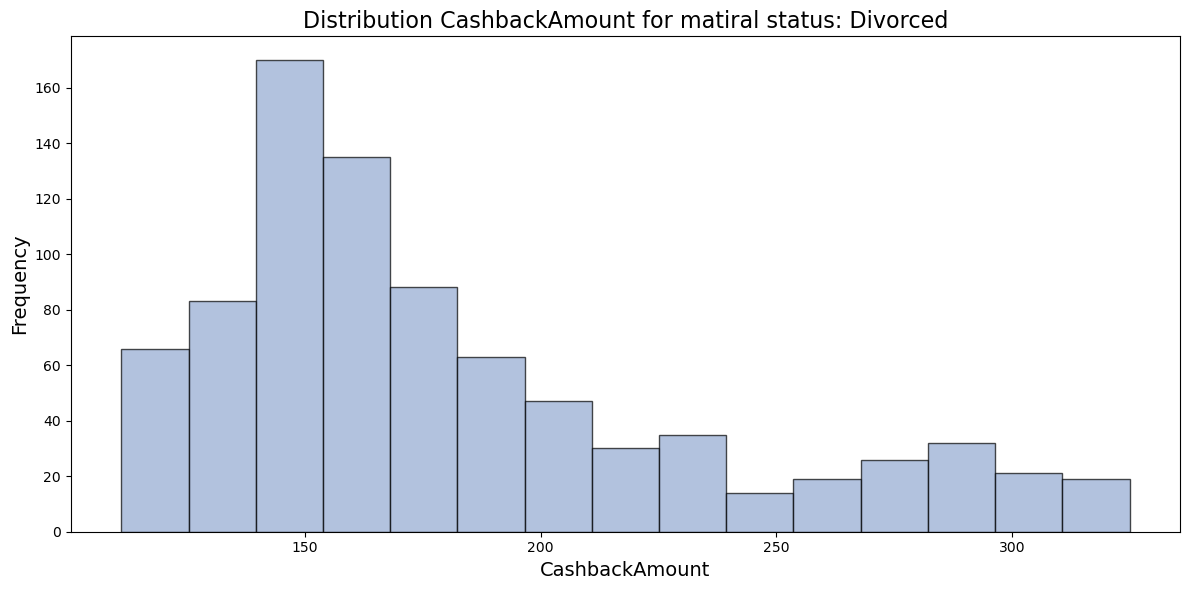

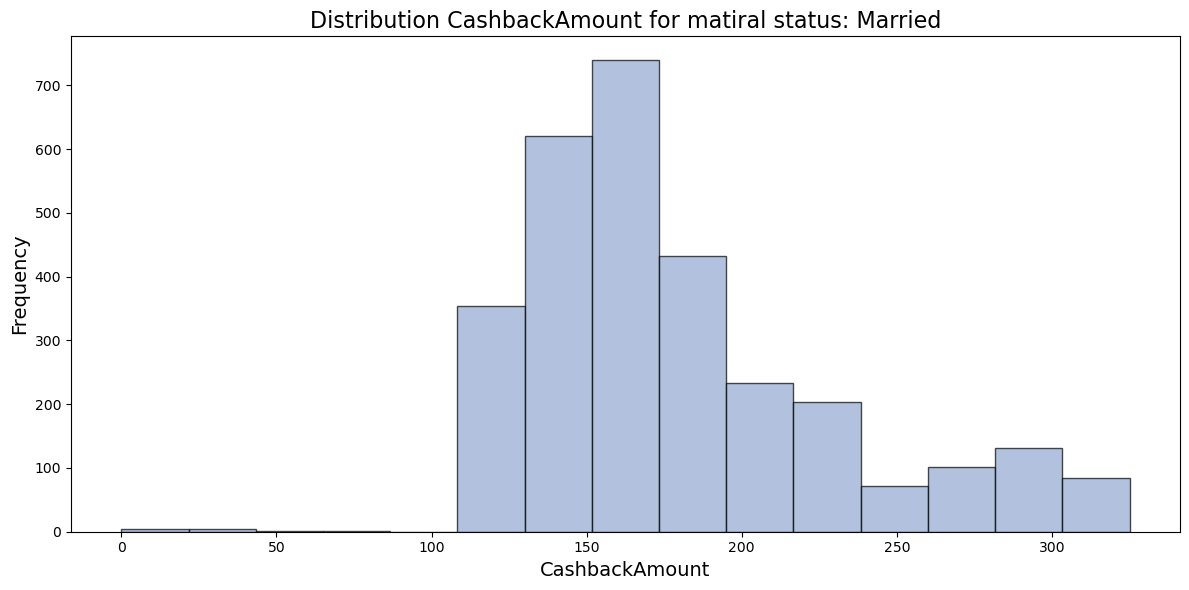

In [175]:
for status in marital_status:
    if status:
        plt.figure(figsize=(12, 6))
        
        sub_df = df[df['MaritalStatus'] == status]
        
        plt.hist(sub_df['CashbackAmount'], bins=15, color='#92a8d1', alpha=0.7, edgecolor='black')
        
        plt.title(f'Distribution CashbackAmount for matiral status: {status}', fontsize=16)
        plt.xlabel('CashbackAmount', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.tight_layout()
        plt.show()

Is there a relationship between the number of coupons used (CouponUsed) and the number of cashbacks?

In [179]:
group_analysis = df.groupby('CashbackGroup')['CouponUsed'].mean().reset_index()
group_analysis

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_9223/1018720562.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_analysis = df.groupby('CashbackGroup')['CouponUsed'].mean().reset_index()


CashbackGroup  CouponUsed
0          0-65    3.545455
1        66-130    0.856955
2       131-195    1.656551
3       196-260    2.430839
4       261-325    2.104015

/var/folders/g_/dlksrxdd3pz88bqsmz91cx540000gn/T/ipykernel_9223/2146772315.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CashbackGroup', y='CouponUsed', data=group_analysis, palette=['#ff6f61', '#6b5b95', '#88b04b', '#f7cac9', '#92a8d1'])


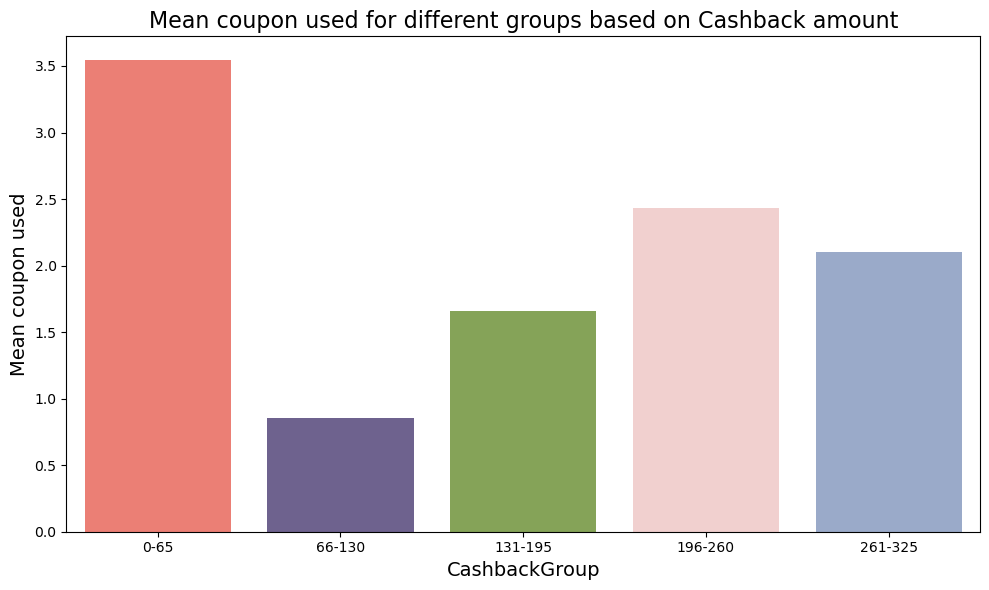

In [181]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CashbackGroup', y='CouponUsed', data=group_analysis, palette=['#ff6f61', '#6b5b95', '#88b04b', '#f7cac9', '#92a8d1'])
plt.title("Mean coupon used for different groups based on Cashback amount", fontsize=16)
plt.xlabel("CashbackGroup", fontsize=14)
plt.ylabel("Mean coupon used", fontsize=14)
plt.tight_layout()
plt.show()